In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from tqdm import tqdm
from progress.bar import IncrementalBar

In [10]:
def plot(trace_file: str, comm_file: str, title: str = 'plot'):
    df = pd.read_csv(trace_file, index_col=0)

#     time = pd.read_csv(comm_file, index_col=0)
#     time = time.fillna('')

    processes = len(df.columns) // 3
    fig, ax = plt.subplots(figsize=(15,8))

    max_time = 0
    status = {}
    isLegendSet = False
    for j in range(processes):
        x = list(df['timestamp' + str(j)].fillna(-1))[1:]
        y = list(df['state' + str(j)].fillna(-1))[1:]
        res = []
        for i, el in enumerate(x):
            if el == -1:
                continue
            el = list(map(float, el.split('-')))
#             el = [float(el)]
            if el[1] > max_time:
                max_time = el[1]
            if y[i] == 'Await for receive':
                el.append('red')
            elif y[i] == 'balance':
                el.append('blue')
            elif y[i] == 'receive':
                el.append('brown')
            elif 'send' in y[i]:
                el.append('orange')
            elif y[i] == 'solve':
                el.append('green')
            else:
                el.append('black')
            if el[-1] not in status.keys():
                status[el[-1]] = False
            el.append(y[i])
            #[start, end, color, command]
            res.append(el)
        for el in res:
            if not status[el[2]]:
                status[el[2]] = True
                ax.plot(el[:-2], [j, j], color=el[2], linewidth=4.0, label=el[3])
            else:
                ax.plot(el[:-2], [j, j], color=el[2], linewidth=4.0)   
    scale = processes / max_time
    head_width = 2
    length = head_width * scale
    ax.legend()
#     for col in time.columns:
#         sndr, rcvr = map(int, col[1:-1].split(', '))
#         for interval in time[col]:
#             if interval != '':
#                 start, end = map(float, interval.split(':'))
#                 y = abs(rcvr-sndr)
#                 x = end-start
#                 gip = math.sqrt(y ** 2 + x ** 2)
#                 sin = y / gip
#                 width = (0.5 / 2 - 0.025 / 2) * sin + 0.025 / 2
#                 cos = x / gip
#                 lenth = (0.5 - 0.025) * cos + 0.025

#                 ax.arrow(start, sndr, end-start, rcvr-sndr, length_includes_head=True, width=width, head_length=lenth)
    plt.xlabel('model time')
    plt.ylabel('process id')
    plt.title(title)
    plt.show()

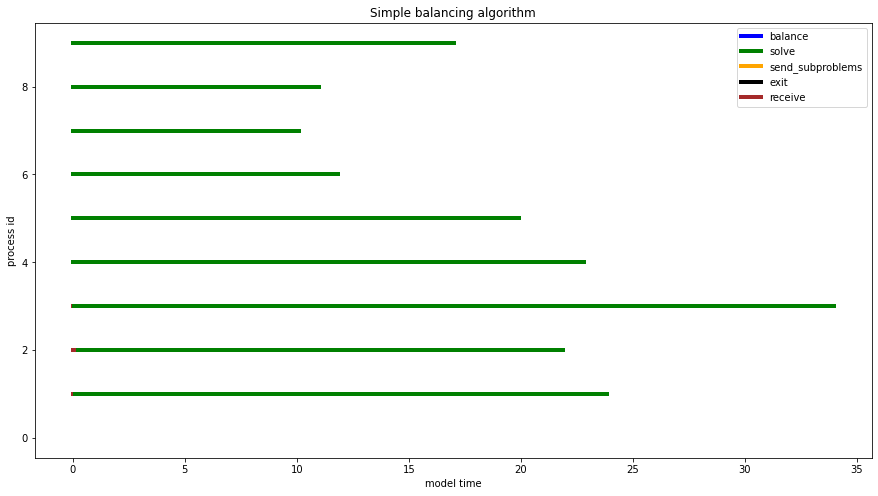

In [6]:
# !mpiexec --hostfile hostfile -n 10 python EngineSimple.py

plot('TraceSimple.csv', 'Communication33.csv', 'Simple balancing algorithm')

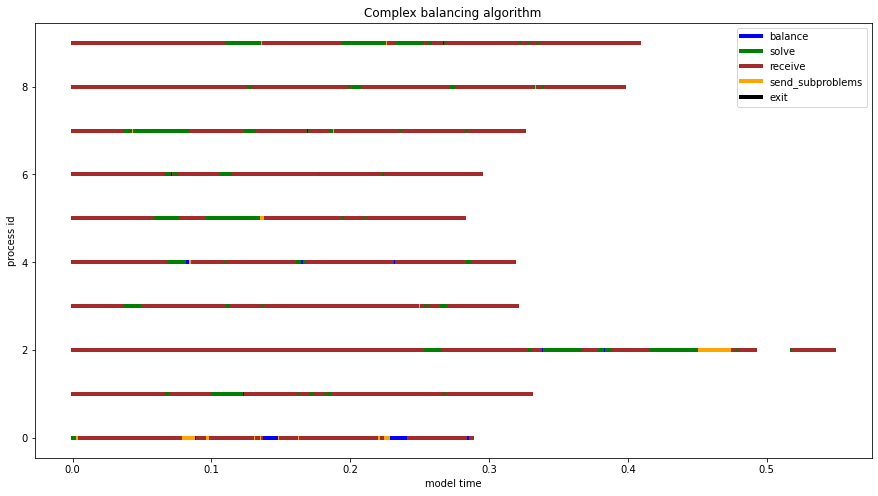

In [62]:
plot('TraceC.csv', 'Communicatio.csv', 'Complex balancing algorithm')


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


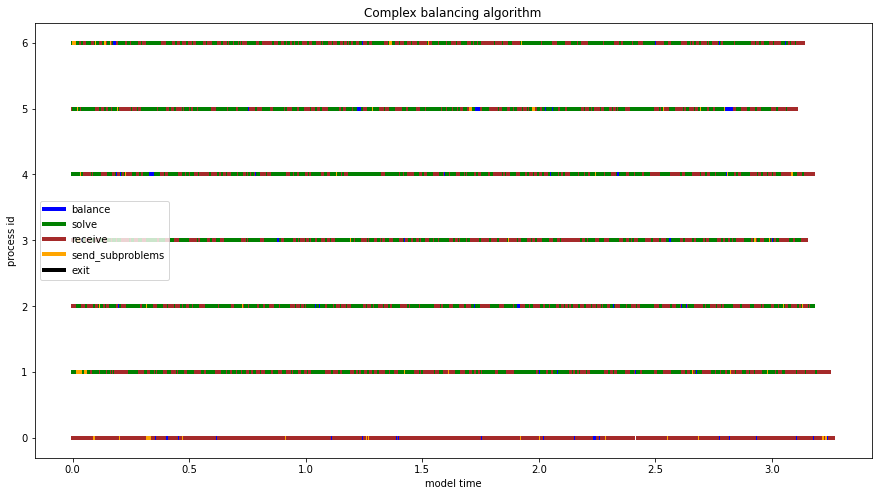

In [5]:
plot('TraceC.csv', 'Communicatio.csv', 'Complex balancing algorithm')
# cnt = count('Trace33.csv', 'Communication33.csv')
# print(f'Speedup: {cnt[0]}\nEfficiency: {cnt[1]}')


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


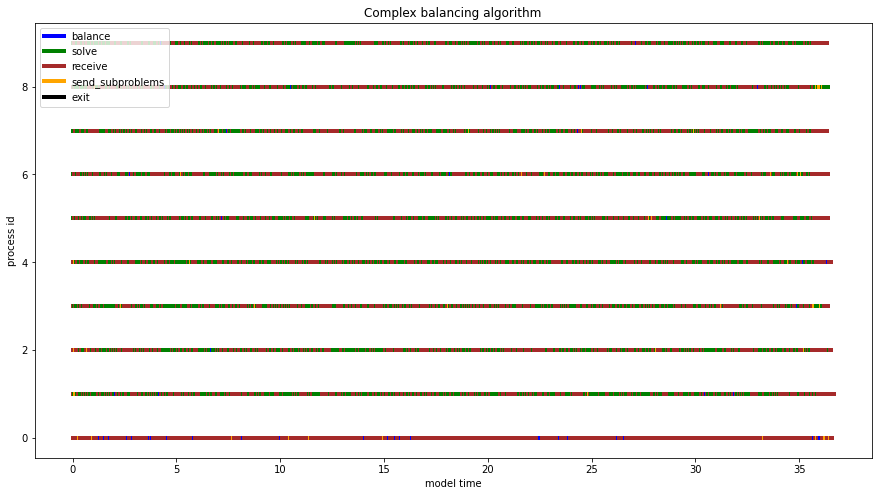

In [60]:
plot('TraceC.csv', 'Communicatio.csv', 'Complex balancing algorithm')

In [3]:
def count(trace_file: str, comm_file: str):
    df = pd.read_csv(trace_file, index_col=0)

    time = pd.read_csv(comm_file, index_col=0)
    time = time.fillna('')

    processes = len(df.columns) // 3

    max_time = 0
    Tseq = 0
    for j in range(processes):
        x = list(df['timestamp' + str(j)].fillna(-1))[1:]
        y = list(df['state' + str(j)].fillna(-1))[1:]
        res = []
        for i, el in enumerate(x):
            if el == -1:
                continue
            el = list(map(float, el.split('-')))
            if el[1] > max_time:
                max_time = el[1]
            if y[i] == 'Solve':
                Tseq += el[1] - el[0]
            el.append(y[i])
            res.append(el)

    acceleration = Tseq / max_time
    efficiency = acceleration / processes
    return acceleration, efficiency

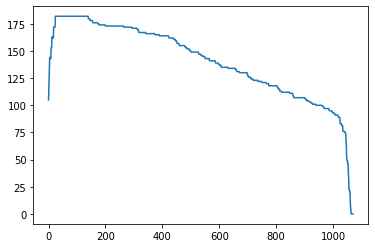

In [13]:
s_am=[105, 115, 124, 134, 144, 144, 144, 143, 143, 153, 153, 153, 163, 162, 162, 162, 162, 162, 172, 172, 172, 172, 172, 172, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 180, 180, 180, 180, 179, 179, 179, 178, 178, 178, 178, 178, 178, 178, 178, 177, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 175, 175, 175, 175, 175, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 170, 170, 170, 170, 170, 168, 168, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 163, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 161, 161, 161, 161, 161, 161, 160, 160, 160, 159, 159, 159, 158, 157, 157, 157, 157, 157, 157, 157, 156, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 154, 154, 154, 154, 153, 153, 153, 153, 152, 152, 152, 152, 152, 152, 152, 152, 151, 151, 151, 150, 150, 150, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 147, 147, 147, 147, 147, 147, 147, 147, 146, 146, 146, 146, 146, 145, 145, 145, 145, 145, 145, 145, 145, 145, 144, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 140, 139, 139, 139, 139, 139, 139, 139, 139, 139, 138, 138, 138, 138, 138, 137, 137, 137, 137, 137, 137, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 133, 133, 133, 133, 132, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 128, 128, 127, 127, 126, 126, 126, 126, 126, 126, 126, 125, 125, 125, 125, 124, 124, 124, 124, 124, 124, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 120, 120, 120, 120, 120, 120, 120, 120, 120, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 117, 117, 116, 116, 115, 115, 115, 115, 115, 113, 113, 113, 113, 113, 113, 113, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 110, 109, 108, 108, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 106, 106, 106, 105, 105, 105, 105, 104, 104, 104, 104, 104, 104, 104, 104, 103, 103, 103, 103, 103, 103, 102, 102, 102, 102, 102, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 99, 99, 99, 99, 99, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 96, 95, 95, 95, 95, 95, 95, 95, 95, 95, 94, 94, 94, 93, 93, 93, 93, 93, 93, 92, 92, 92, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 90, 89, 89, 89, 89, 89, 88, 83, 83, 83, 83, 83, 83, 81, 81, 81, 81, 76, 76, 76, 76, 76, 76, 75, 75, 75, 75, 73, 66, 62, 52, 50, 49, 49, 46, 46, 38, 34, 23, 22, 22, 20, 20, 9, 6, 4, 0, 0, 0, 0, 0, 0, 0]
plt.plot(list(range(len(s_am))), s_am)

# Plot statistics
example from internet:

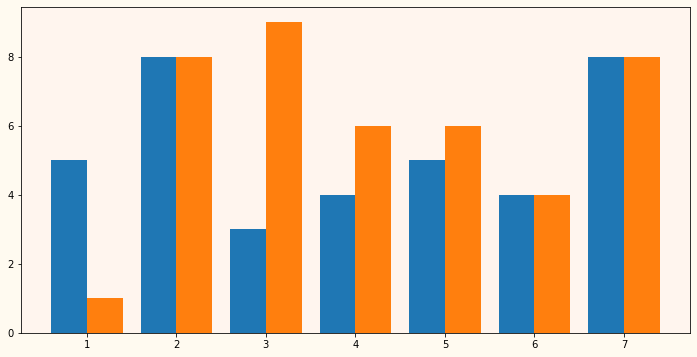

In [63]:
x1 = np.arange(1, 8) - 0.2
x2 = np.arange(1, 8) + 0.2
y1 = np.random.randint(1, 10, size = 7)
y2 = np.random.randint(1, 10, size = 7)

fig, ax = plt.subplots()

ax.bar(x1, y1, width = 0.4)
ax.bar(x2, y2, width = 0.4)

ax.set_facecolor('seashell')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
fig.set_facecolor('floralwhite')

plt.show()

In [67]:
x1

array([0.8, 1.8, 2.8, 3.8, 4.8, 5.8, 6.8])

In [113]:
def plot_statistics(trace_file: str, title: str = 'Stat plot'):
    df = pd.read_csv(trace_file, index_col=0)

    processes = len(df.columns) // 3
    fig, ax = plt.subplots(figsize=(15,8))

    x_rcv = np.arange(0, processes) - 0.3
    x_snd = np.arange(0, processes) - 0.1
    x_slv = np.arange(0, processes) + 0.1
    x_blc = np.arange(0, processes) + 0.3
    
    y_rcv = []
    y_snd = []
    y_slv = []
    y_blc = []
    
    status = {}
    isLegendSet = False
    for j in range(processes):
        times = list(df['timestamp' + str(j)].fillna(-1))[1:]
        states = list(df['state' + str(j)].fillna(-1))[1:]
        res = []
        rcv = 0.
        snd = 0.
        slv = 0.
        blc = 0.
        for i, el in enumerate(times):
            if el == -1:
                continue
            el = list(map(float, el.split('-')))
            if states[i] == 'Await for receive':
                el.append('red')
            elif states[i] == 'balance':
                blc += el[1] - el[0]
            elif states[i] == 'receive':
                rcv += el[1] - el[0]
            elif 'send' in states[i]:
                snd += el[1] - el[0]
            elif states[i] == 'solve':
                slv += el[1] - el[0]
        y_rcv.append(rcv)
        y_snd.append(snd)
        y_slv.append(slv)
        y_blc.append(blc)
    
    colors = {'rcv': 'brown', 'snd': 'orange', 'slv': 'green', 'blc': 'blue'}
    
    bar_plot = ax.bar(x_rcv, y_rcv, width = 0.2, color=colors['rcv'])
    bar_plot = bar_plot + ax.bar(x_snd, y_snd, width = 0.2, color=colors['snd'])
    bar_plot = bar_plot + ax.bar(x_slv, y_slv, width = 0.2, color=colors['slv'])
    bar_plot = bar_plot + ax.bar(x_blc, y_blc, width = 0.2, color=colors['blc'])
    
    bar_label=y_rcv+y_snd+y_slv+y_blc
    for idx, rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                round(bar_label[idx], 4),
                ha='center', va='bottom', rotation=90)
    
    for k, v in colors.items():
        ax.bar(-1, 0, width = 0, color=v, label=k)

    ax.set_facecolor('seashell')
    fig.set_facecolor('floralwhite')
    ax.legend()
    plt.ylabel('time')
    plt.xlabel('process id')
    plt.title(title)
    plt.show()

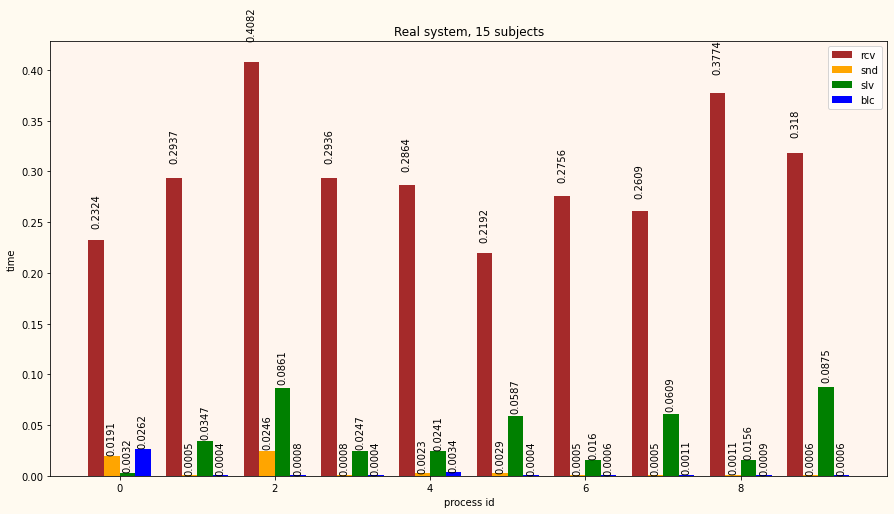

In [115]:
plot_statistics('TraceC.csv', 'Real system, 15 subjects')

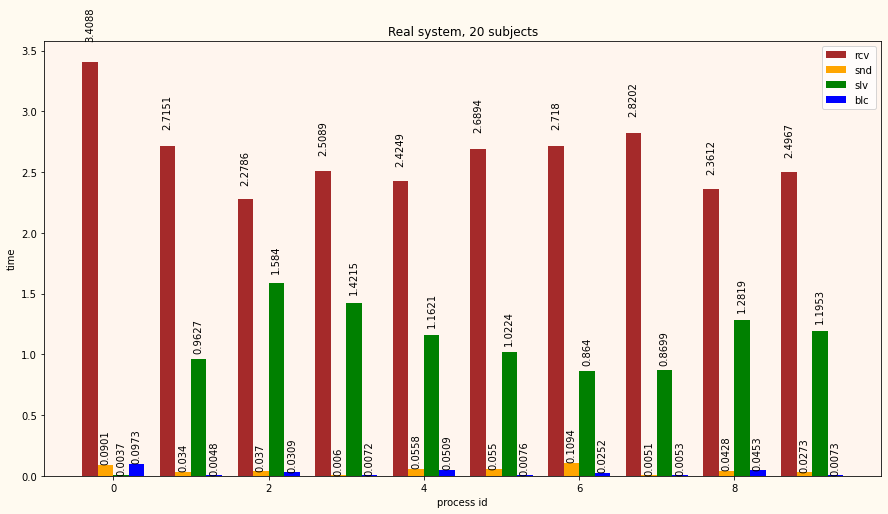

In [116]:
plot_statistics('TraceC.csv', 'Real system, 20 subjects')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


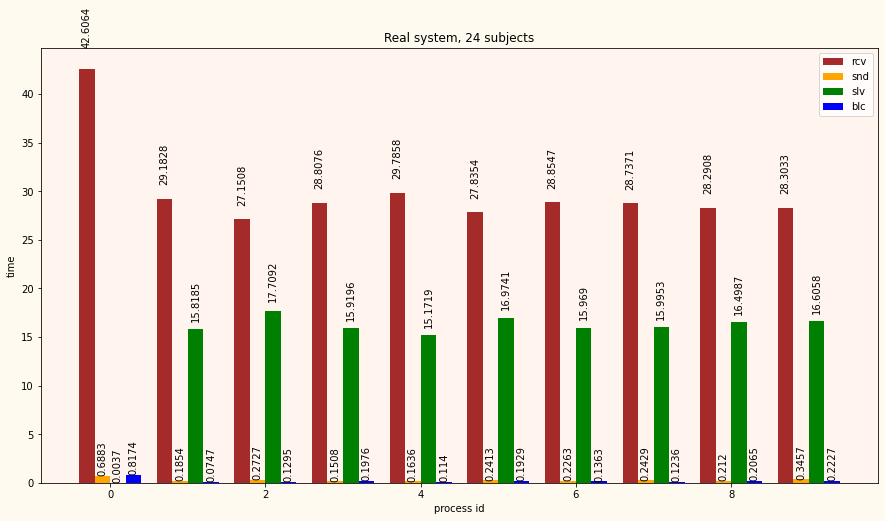

In [117]:
plot_statistics('TraceC.csv', 'Real system, 24 subjects')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


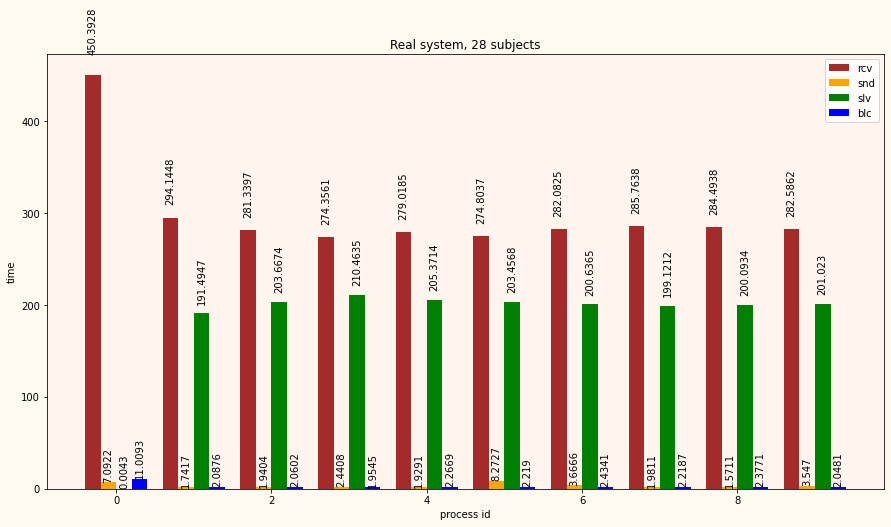

In [118]:
plot_statistics('TraceC.csv', 'Real system, 28 subjects')

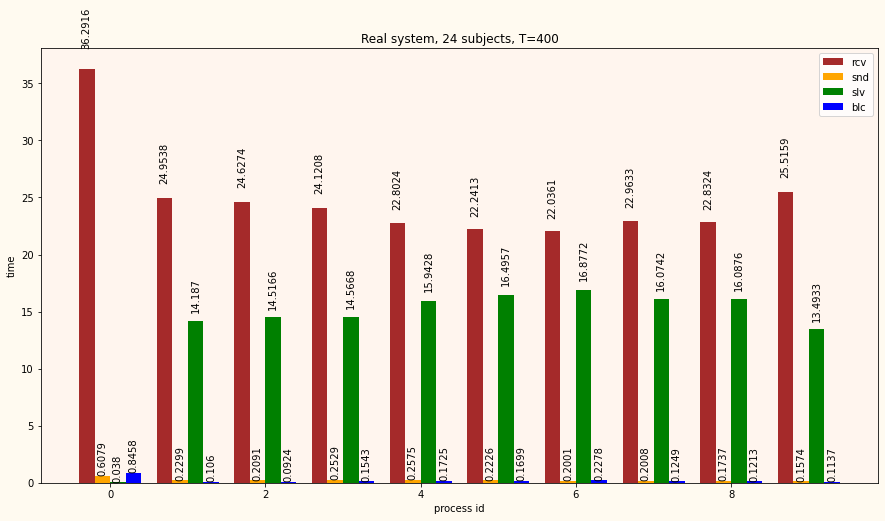

In [119]:
plot_statistics('TraceC.csv', 'Real system, 24 subjects, T=400')

In [8]:
am = 0
suma = (0, 0)
for i in tqdm(range(am)):
    try:
        eng = Engine(proc_amount=10, max_depth=20)
        eng.run()
    except Exception:
#         print('n')
        continue
    cur = count('Trace.csv', 'Communication.csv')
    suma = tuple(map(sum, zip(suma, cur)))
# suma
acc_average = suma[0] / am
eff_average = suma[1] / am

print(f'Acceleration: {acc_average}\nEfficiency: {eff_average}')

0it [00:00, ?it/s]


ZeroDivisionError: division by zero

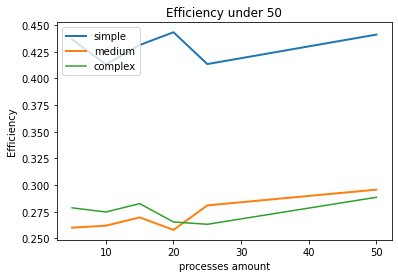

In [10]:
x1=[0.436482114,0.413069099,0.431287537,0.443265368,0.413425653,0.441064898]
x2=[0.259990096,0.26185991,0.269618974,0.257903146,0.280897581,0.295667281]
x3=[0.278613218,0.274713947,0.282554042,0.265360369,0.26316751,0.288510803]

x4=[0.610337353,0.628401689,0.616084879,0.622497127,0.619263894]
x5=[0.657465962,0.650249205,0.651677935,0.641132954,0.631164836]
x6=[0.697555496,0.673020157,0.687210302,0.675430268,0.69638548]

x7=[0.647148483,0.664537678,0.649004463,0.651378291,0.625314868,0.633828124]
x8=[0.817585103,0.779793032,0.803009341,0.805948317,0.777709897,0.791460961]
x9=[0.840410834,0.867059051,0.832178328,0.85787612,0.842881944,0.855508134]

y1=[5, 10, 15, 20, 25, 50]
y2=[100, 150, 200, 250, 500]
y3=[1000, 1500, 2000, 2500, 5000, 10000]

# x = np.arange(0, 2*np.pi, 0.02)
# y = np.sin(x)
# y1 = np.sin(2*x)
# y2 = np.sin(3*x)
# ym1 = np.ma.masked_where(y1 > 0.5, y1)
# ym2 = np.ma.masked_where(y2 < -0.5, y2)

lines = plt.plot(y1, x1, y1, x2, y1, x3)
plt.setp(lines[0], linewidth=2)
plt.setp(lines[1], linewidth=2)
plt.setp(lines[2], markersize=2)

plt.legend(('simple', 'medium', 'complex'),
           loc='upper left')
plt.title('Efficiency under 50')
plt.xlabel('processes amount')
plt.ylabel('Efficiency')

plt.show()

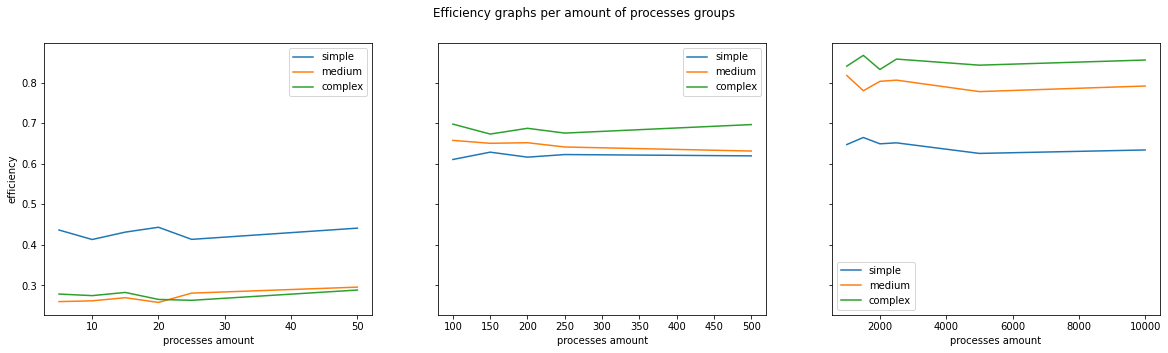

In [39]:
import numpy as np


fig, axs = plt.subplots(1, 3,figsize=(20,5), sharey=True)
fig.suptitle('Efficiency graphs per amount of processes groups')
axs[0].plot(y1, x1, y1, x2, y1, x3)
# axs[0].set_title('Efficiency')
axs[0].legend(('simple', 'medium', 'complex'))

axs[1].plot(y2, x4, y2, x5, y2, x6)
# axs[1].set_title('Axis [0,1]')
axs[1].legend(('simple', 'medium', 'complex'))

axs[2].plot(y3, x7, y3, x8, y3, x9)
# axs[2].set_title('Axis [0,1]')
axs[2].legend(('simple', 'medium', 'complex'))

for ax in axs.flat:
    ax.set(xlabel='processes amount', ylabel='efficiency')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    

In [41]:
a1=[2.182410568,4.130690991,6.469313061,8.865307353,10.33564132,22.05324492]
a2=[1.29995048,2.618599101,4.044284614,5.158062911,7.022439515,14.78336405]
a3=[1.393066088,2.747139469,4.238310635,5.30720738,6.579187748,14.42554013]

a4=[61.03373534,94.26025333,123.2169758,155.6242817,309.6319472]
a5=[65.74659619,97.53738074,130.3355869,160.2832386,315.5824182]
a6=[69.75554958,100.9530236,137.4420605,168.8575671,348.1927401]

a7=[647.1484826,996.806517,1298.008925,1628.445728,3126.574339,6338.281238]
a8=[817.5851029,1169.689548,1606.018681,2014.870791,3888.549484,7914.609614]
a9=[840.4108343,1300.588576,1664.356655,2144.690299,4214.409718,8555.081345]

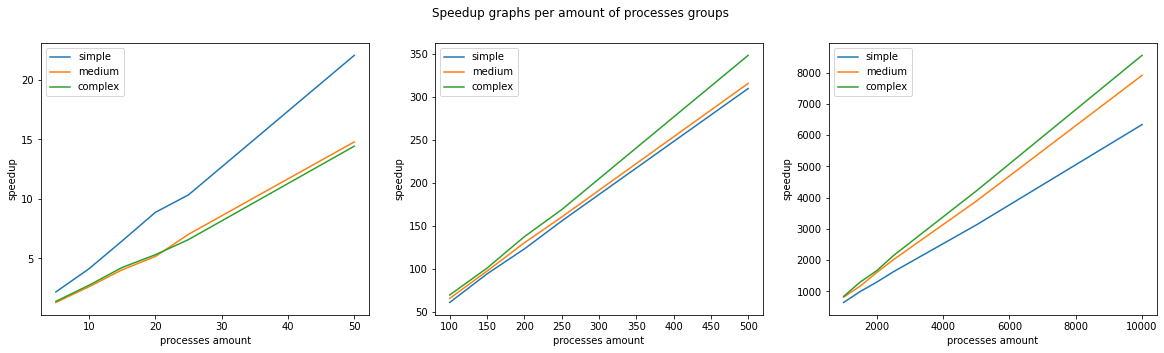

In [45]:
fig, axs = plt.subplots(1, 3,figsize=(20,5))
fig.suptitle('Speedup graphs per amount of processes groups')
axs[0].plot(y1, a1, y1, a2, y1, a3)
# axs[0].set_title('Efficiency')
axs[0].legend(('simple', 'medium', 'complex'))

axs[1].plot(y2, a4, y2, a5, y2, a6)
# axs[1].set_title('Axis [0,1]')
axs[1].legend(('simple', 'medium', 'complex'))

axs[2].plot(y3, a7, y3, a8, y3, a9)
# axs[2].set_title('Axis [0,1]')
axs[2].legend(('simple', 'medium', 'complex'))

for ax in axs.flat:
    ax.set(xlabel='processes amount', ylabel='speedup')

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()
    

## Count receive lin formulae

In [29]:
# !pip install ggplot

In [31]:
import statsmodels.api as sm
import patsy as pt
import sklearn.linear_model as lm
# from ggplot import *


In [12]:
rcvs=[0.1193461, 0.0063243, 0.0000257, 0.0338659, 0.0000179, 0.0000138, 0.0000131, 0.0000131, 0.0044351, 0.0032749, 0.0129402, 0.0000140, 0.0000388, 0.0000193, 0.0005992, 0.0000439, 0.0017700, 0.0052571, 0.0172580, 0.0000451, 0.0000119, 0.0000110, 0.0000138, 0.0000370, 0.0000110, 0.0000131, 0.0037959, 0.0046081, 0.0005529, 0.0000178, 0.0171327, 0.0000140, 0.0000157, 0.0000110, 0.0000100, 0.0000138, 0.0000394, 0.0032591, 0.0037523, 0.0006721, 0.0013189, 0.0281160, 0.0000231, 0.0000122, 0.0000100, 0.0000100, 0.0000091, 0.0000138, 0.0000179, 0.0010497, 0.0041323, 0.0028250, 0.0013797, 0.0205891, 0.0000139, 0.0000110, 0.0000113, 0.0000101, 0.0000100, 0.0000098, 0.0000100, 0.0048011, 0.0023470, 0.0010541, 0.0203809, 0.0000169, 0.0000110, 0.0000148, 0.0000141, 0.0000983, 0.0000148, 0.0000109, 0.0037479, 0.0013730, 0.0012869, 0.0009442, 0.0004571, 0.0126431, 0.0000148, 0.0000109, 0.0000112, 0.0000097, 0.0000141, 0.0000132, 0.0034230, 0.0000162, 0.0025332, 0.0021329, 0.0000219, 0.0007569, 0.0042179, 0.0000219, 0.0022430, 0.0022881, 0.0004442, 0.0234771, 0.0000141, 0.0000109, 0.0000103, 0.0000128, 0.0000139, 0.0000129, 0.0000121, 0.0000861, 0.0000191, 0.0000219, 0.0000169, 0.0010302, 0.0036621, 0.0014260, 0.0030241, 0.0000188, 0.0161438, 0.0000162, 0.0000141, 0.0000139, 0.0000119, 0.0000122, 0.0000121, 0.0001400, 0.0015030, 0.0009840, 0.0002540, 0.0014422, 0.0009427, 0.0013418, 0.0002041, 0.0006473, 0.0215149, 0.0000138, 0.0000128, 0.0000098, 0.0000110, 0.0000110, 0.0000141, 0.0000131, 0.0000128, 0.0009751, 0.0000460, 0.0041962, 0.0021460, 0.0002940, 0.0023749, 0.0000198, 0.0016739, 0.0032150, 0.0000179, 0.0032270, 0.0304442, 0.0000169, 0.0000152, 0.0000127, 0.0000160, 0.0000119, 0.0000131, 0.0000188, 0.0020228, 0.0009160, 0.0009480, 0.0024080, 0.0014362, 0.0214880, 0.0000160, 0.0000188, 0.0000100, 0.0000098, 0.0000100, 0.0000141, 0.0000162, 0.0050449, 0.0000162, 0.0002571, 0.0022250, 0.0011930, 0.0019040, 0.0005360, 0.0002050, 0.0229161, 0.0000148, 0.0000122, 0.0000100, 0.0000140, 0.0000141, 0.0000119, 0.0000109, 0.0000148, 0.0038569, 0.0001180, 0.0023570, 0.0001259, 0.0000127, 0.0090773, 0.0000172, 0.0000138, 0.0000131, 0.0000673, 0.0034990, 0.0000140, 0.0006480, 0.0042586, 0.0186300, 0.0000141, 0.0000110, 0.0000098, 0.0000119, 0.0000110, 0.0000238, 0.0000100, 0.0000098, 0.0053739, 0.0000132, 0.0000169, 0.0041620, 0.0002802, 0.0190191, 0.0000169, 0.0000131, 0.0000128, 0.0000181, 0.0000131, 0.0000128, 0.0000141, 0.0038719, 0.0005009, 0.0009427, 0.0038381, 0.0000270, 0.0000110, 0.0000110, 0.0000110, 0.0000100, 0.0000138, 0.0000140, 0.0000122, 0.0025339, 0.0012490, 0.0013978, 0.0000160, 0.0223160, 0.0000141, 0.0000139, 0.0000143, 0.0000119, 0.0000131, 0.0000119, 0.0000121, 0.0004799, 0.0028300, 0.0033281, 0.0327580, 0.0000219, 0.0000150, 0.0000119, 0.0000144, 0.0000121, 0.0000119, 0.0000260, 0.0019891, 0.0005958, 0.0015679, 0.0008812, 0.0003070, 0.0000262, 0.0019159, 0.0000780, 0.0195010, 0.0000150, 0.0000110, 0.0000100, 0.0000100, 0.0000148, 0.0000100, 0.0000100, 0.0031812, 0.0055721, 0.0000980, 0.0162590, 0.0000231, 0.0000141, 0.0000169, 0.0000112, 0.0000131, 0.0000131, 0.0009461, 0.0020461, 0.0035400, 0.0000203, 0.0009169, 0.0277260, 0.0000181, 0.0000160, 0.0000157, 0.0000120, 0.0000171, 0.0000138, 0.0000150, 0.0025201, 0.0013249, 0.0008390, 0.0036280, 0.0216830, 0.0000179, 0.0000119, 0.0000122, 0.0000126, 0.0000141, 0.0000119, 0.0000126, 0.0004070, 0.0056428, 0.0000882, 0.0146718, 0.0000160, 0.0000141, 0.0000179, 0.0000171, 0.0000141, 0.0023239, 0.0000460, 0.0004342, 0.0001061, 0.0019250, 0.0065248, 0.0228119, 0.0000193, 0.0000150, 0.0000126, 0.0000310, 0.0000147, 0.0000139, 0.0000131, 0.0048912, 0.0016360, 0.0013052, 0.0214510, 0.0000150, 0.0000151, 0.0000139, 0.0000131, 0.0000119, 0.0000131, 0.0005021, 0.0013750, 0.0002079, 0.0004441, 0.0003031, 0.0008349, 0.0026700, 0.0000861, 0.0194983, 0.0000140, 0.0000117, 0.0000110, 0.0000141, 0.0000129, 0.0000162, 0.0000119, 0.0000122, 0.0000120, 0.0017788, 0.0019970, 0.0002639, 0.0006511, 0.0037241, 0.0226408, 0.0000150, 0.0000141, 0.0000131, 0.0000128, 0.0000122, 0.0000119, 0.0000120, 0.0000119, 0.0017881, 0.0006840, 0.0013940, 0.0001660, 0.0000790, 0.0006940, 0.0035569, 0.0003130, 0.0000319, 0.0000141, 0.0000122, 0.0000119, 0.0000231, 0.0010431, 0.0003572, 0.0034769, 0.0006630, 0.0001709, 0.0009169, 0.0000732, 0.0005030, 0.0199440, 0.0000139, 0.0000109, 0.0000101, 0.0000100, 0.0000136, 0.0000138, 0.0000132, 0.0031919, 0.0007808, 0.0025060, 0.0000110, 0.0023801, 0.0000780, 0.0141081, 0.0000141, 0.0000110, 0.0000116, 0.0000120, 0.0000271, 0.0000129, 0.0000159, 0.0020790, 0.0000761, 0.0031337, 0.0000189, 0.0027079, 0.0012260, 0.0007417, 0.0312538, 0.0000148, 0.0000112, 0.0000150, 0.0000131, 0.0000110, 0.0000129, 0.0000131, 0.0036678, 0.0013661, 0.0029249, 0.0004442, 0.0037570, 0.0000162, 0.0009930, 0.0003399, 0.0028581, 0.0000178, 0.0001619, 0.0023959, 0.0107351, 0.0000160, 0.0000129, 0.0000131, 0.0000131, 0.0261781, 0.0000200, 0.0000110, 0.0000109, 0.0000100, 0.0000110, 0.0000100, 0.0000098, 0.0053551, 0.0008740, 0.0004270, 0.0000319, 0.0028507, 0.0166102, 0.0000210, 0.0000131, 0.0000129, 0.0000119, 0.0000131, 0.0000109, 0.0042748, 0.0000163, 0.0000670, 0.0012362, 0.0033848, 0.0006309, 0.0043421, 0.0238852, 0.0000170, 0.0000148, 0.0000131, 0.0000141, 0.0000152, 0.0000141, 0.0037770, 0.0004890, 0.0028489, 0.0019362, 0.0000293, 0.0112209, 0.0000179, 0.0000141, 0.0000181, 0.0000141, 0.0000141, 0.0031152, 0.0011668, 0.0000188, 0.0013719, 0.0001149, 0.0025101, 0.0279979, 0.0000152, 0.0000150, 0.0000100, 0.0000088, 0.0000101, 0.0000100, 0.0000129, 0.0000141, 0.0012929, 0.0011993, 0.0018208, 0.0049557, 0.0000756, 0.0205240, 0.0000167, 0.0000121, 0.0000310, 0.0000157, 0.0000140, 0.0010843, 0.0000148, 0.0035841, 0.0007112, 0.0000970, 0.0040140, 0.0006571, 0.0135234, 0.0000148, 0.0000119, 0.0000101, 0.0000100, 0.0000139, 0.0010531, 0.0022691, 0.0017050, 0.0007019, 0.0010440, 0.0005288, 0.0214341, 0.0000160, 0.0000110, 0.0000131, 0.0000140, 0.0000131, 0.0000109, 0.0000119, 0.0005982, 0.0046520, 0.0005870, 0.0031800, 0.0000429, 0.0000410, 0.0000119, 0.0000100, 0.0000172, 0.0000110, 0.0000098, 0.0000138, 0.0000128, 0.0000141, 0.0013959, 0.0015490, 0.0006442, 0.0018881, 0.0010030, 0.0004301, 0.0005310, 0.0201900, 0.0000129, 0.0000121, 0.0000239, 0.0000101, 0.0000117, 0.0000143, 0.0033710, 0.0039351, 0.0012938, 0.0107420, 0.0000148, 0.0000109, 0.0000120, 0.0000110, 0.0011971, 0.0035861, 0.0000231, 0.0012851, 0.0029059, 0.0008111, 0.0009000, 0.0032420, 0.0005377, 0.0029299, 0.0006921, 0.0253062, 0.0000158, 0.0000141, 0.0000129, 0.0000128, 0.0000131, 0.0000122, 0.0000131, 0.0000121, 0.0003478, 0.0019398, 0.0025229, 0.0017791, 0.0012889, 0.0028560, 0.0003528, 0.0037260, 0.0005741, 0.0022380, 0.0000172, 0.0421760, 0.0000141, 0.0000110, 0.0000166, 0.0000132, 0.0000139, 0.0000129, 0.0000122, 0.0000119, 0.0009539, 0.0014329, 0.0041029, 0.0000138, 0.0000112, 0.0012901, 0.0000140, 0.0019639, 0.0139908, 0.0000210, 0.0000131, 0.0000131, 0.0000119, 0.0003779, 0.0010634, 0.0009492, 0.0015550, 0.0005241, 0.0056939, 0.0000189, 0.0015230, 0.0160561, 0.0000131, 0.0000122, 0.0000139, 0.0000138, 0.0000131, 0.0021472, 0.0033149, 0.0010040, 0.0013419, 0.0021379, 0.0002372, 0.0028720, 0.0000179, 0.0032089, 0.0014420, 0.0000699, 0.0244729, 0.0000159, 0.0000110, 0.0000112, 0.0000089, 0.0000100, 0.0000101, 0.0000128, 0.0040898, 0.0008750, 0.0002659, 0.0299220, 0.0000151, 0.0000110, 0.0000100, 0.0000198, 0.0000148, 0.0000158, 0.0000141, 0.0000329, 0.0024238, 0.0011499, 0.0001080, 0.0001390, 0.0030160, 0.0002949, 0.0202889, 0.0000141, 0.0000110, 0.0000112, 0.0000110, 0.0000100, 0.0000138, 0.0000141, 0.0013440, 0.0021801, 0.0007653, 0.0001762, 0.0013210, 0.0001510, 0.0026529, 0.0001240, 0.0175209, 0.0000162, 0.0000138, 0.0000109, 0.0000110, 0.0000119, 0.0000119, 0.0000120, 0.0004120, 0.0005710, 0.0039771, 0.0010888, 0.0026722, 0.0156181, 0.0000141, 0.0000143, 0.0000220, 0.0000119, 0.0000117, 0.0000150, 0.0000119, 0.0018232, 0.0067499, 0.0145149, 0.0000150, 0.0000097, 0.0000138, 0.0000141, 0.0000122, 0.0001822, 0.0028732, 0.0001779, 0.0026181, 0.0000151, 0.0023160, 0.0014022, 0.0181229, 0.0000138, 0.0000121, 0.0000100, 0.0000153, 0.0000138, 0.0000121, 0.0000119, 0.0000120, 0.0014630, 0.0005758, 0.0001442, 0.0023871, 0.0020450, 0.0195289, 0.0000169, 0.0000131, 0.0000129, 0.0000119, 0.0000119, 0.0000119, 0.0000121, 0.0040478, 0.0011330, 0.0033078, 0.0026620, 0.0002019, 0.0242539, 0.0000159, 0.0000110, 0.0000116, 0.0000141, 0.0000131, 0.0000119, 0.0000122, 0.0000117, 0.0037752, 0.0002553, 0.0009241, 0.0028989, 0.0118420, 0.0000129, 0.0000141, 0.0000141, 0.0000119, 0.0000141, 0.0000160, 0.0018990, 0.0013411, 0.0000120, 0.0025961, 0.0001779, 0.0007970, 0.0018907, 0.0196798, 0.0000170, 0.0000131, 0.0000129, 0.0000121, 0.0000120, 0.0000141, 0.0019932, 0.0000210, 0.0006428, 0.0060968, 0.0272792, 0.0000181, 0.0000160, 0.0000141, 0.0000141, 0.0000160, 0.0000119, 0.0000121, 0.0009880, 0.0010707, 0.0022259, 0.0000158, 0.0003431, 0.0009186, 0.0029982, 0.0000360, 0.0000151, 0.0000131, 0.0000120, 0.0000109, 0.0000131, 0.0013229, 0.0006082, 0.0010829, 0.0004708, 0.0014692, 0.0009749, 0.0024438, 0.0029308, 0.0031178, 0.0000179, 0.0004609, 0.0036390, 0.0007792, 0.0015323, 0.0012948, 0.0209749, 0.0000178, 0.0000179, 0.0000131, 0.0000121, 0.0000119, 0.0000120, 0.0047691, 0.0000170, 0.0000141, 0.0036888, 0.0002062, 0.0012191, 0.0003059, 0.0039051, 0.0003419, 0.0018559, 0.0012999, 0.0012710, 0.0000131, 0.0012870, 0.0000730, 0.0273750, 0.0000150, 0.0000110, 0.0000112, 0.0000101, 0.0000100, 0.0000126, 0.0000141, 0.0000129, 0.0033488, 0.0000150, 0.0007050, 0.0040839, 0.0004790, 0.0001142, 0.0000551, 0.0000190, 0.0000159, 0.0000141, 0.0000150, 0.0000141, 0.0000119, 0.0000131, 0.0014871, 0.0034342, 0.0021789, 0.0000570, 0.0006168, 0.0003669, 0.0170622, 0.0000129, 0.0000121, 0.0000110, 0.0000131, 0.0000100, 0.0000100, 0.0000100, 0.0000139, 0.0014060, 0.0031429, 0.0002911, 0.0007990, 0.0018711, 0.0157628, 0.0000150, 0.0000110, 0.0000110, 0.0000089, 0.0000138, 0.0000131, 0.0000153, 0.0018849, 0.0012169, 0.0010468, 0.0045900, 0.0007339, 0.0002508, 0.0231860, 0.0000179, 0.0000110, 0.0000141, 0.0000131, 0.0000120, 0.0000129, 0.0010078, 0.0025230, 0.0028100, 0.0020073, 0.0008900, 0.0223348, 0.0000172, 0.0000138, 0.0000131, 0.0000109, 0.0000140, 0.0000121, 0.0008340, 0.0000577, 0.0030567, 0.0004878, 0.0000811, 0.0022568, 0.0008602, 0.0001740, 0.0120180, 0.0000170, 0.0000140, 0.0000131, 0.0000131, 0.0011179, 0.0003782, 0.0005948, 0.0000119, 0.0003440, 0.0002591, 0.0004111, 0.0002019, 0.0001978, 0.0001411, 0.0005350, 0.0000782, 0.0005341, 0.0000960, 0.0001089, 0.0004952, 0.0000150, 0.0006008, 0.0000620, 0.0003159, 0.0000410, 0.0005512, 0.0003502, 0.0000262, 0.0000112, 0.0000160, 0.0000119, 0.0000110, 0.0000138, 0.0000131, 0.0002291, 0.0000129, 0.0005100, 0.0001199, 0.0002179, 0.0004139, 0.0001800, 0.0003331, 0.0000520, 0.0004649, 0.0000140, 0.0000119, 0.0002868, 0.0000131, 0.0003259, 0.0002460, 0.0000132, 0.0003469, 0.0002480, 0.0002511, 0.0000591, 0.0002229, 0.0003619, 0.0000152, 0.0000140, 0.0002220, 0.0003250, 0.0000219, 0.0001838, 0.0001197, 0.0003459, 0.0000162, 0.0000460, 0.0000119, 0.0216022, 0.0000150, 0.0000131, 0.0000140, 0.0000131, 0.0000110, 0.0000140, 0.0000122, 0.0000110, 0.0004279, 0.0006411, 0.0000122, 0.0006649, 0.0000121, 0.0003419, 0.0000122, 0.0001529, 0.0003882, 0.0001440, 0.0000379, 0.0003562, 0.0004762, 0.0001400, 0.0002918, 0.0000419, 0.0000131, 0.0005901, 0.0004370, 0.0001328, 0.0000842, 0.0003181, 0.0000138, 0.0000229, 0.0000169, 0.0005400, 0.0000388, 0.0000119, 0.0003321, 0.0104299, 0.0000151, 0.0000091, 0.0000091, 0.0000091, 0.0000126, 0.0000241, 0.0000119, 0.0000088, 0.0000141, 0.0000110, 0.0000131, 0.0040279, 0.0007167, 0.0007369, 0.0001321, 0.0000141, 0.0000120, 0.0000291, 0.0000110, 0.0000170, 0.0000529, 0.0081799, 0.0000141, 0.0000448, 0.0001128, 0.0000129, 0.0000367, 0.0000141, 0.0000193, 0.0001621, 0.0000140, 0.0000598, 0.0004251, 0.1659258, 0.0000479, 0.0000129, 0.0000091, 0.0000110, 0.0000110, 0.0001309, 0.0000488, 0.0000410, 0.0061490, 0.0844021, 0.0000158, 0.0000147, 0.0000389, 0.0000148, 0.0000110, 0.0000109, 0.0000119, 0.0000100, 0.0000088, 0.0000932, 0.0010352, 0.0008109, 0.0015671, 0.0392520, 0.0000198, 0.0000091, 0.0000091, 0.0279103, 0.0000258, 0.0199611, 0.0001648, 0.0000940, 0.0000949, 0.0000458, 0.0000787, 0.0000470, 0.0000560, 0.0000567, 0.0223081, 0.0000381, 0.0000350, 0.0134869, 0.0011480, 0.0000481, 0.0000382, 0.0280320, 0.0038552, 0.0298359, 0.0250201, 0.0000360, 0.0000451, 0.0232899, 0.0000520, 0.0000363, 0.0216613, 0.0000551, 0.0000419, 0.0001588, 0.0245697, 0.0228159, 0.0216539, 0.0284519, 0.0348439, 0.0179360, 0.0050569, 0.0000331, 0.0320158, 0.0171728, 0.0025830, 0.0001070, 0.0169201, 0.0001428, 0.0000350, 0.0000520, 0.0183849, 0.0212150, 0.0000320, 0.0000412, 0.0000529, 0.0000629, 0.0180418, 0.0000463, 0.0189356, 0.0000410, 0.0442941, 0.0000363, 0.0000960, 0.0235830, 0.0025542, 0.0381047, 0.0077829, 0.0003068, 0.0000730, 0.0248942, 0.0320821, 0.0121610, 0.0000379, 0.0423210, 0.0322139, 0.0242851, 0.0226419, 0.0247729, 0.0000689, 0.0362561, 0.0300810, 0.0052510, 0.0213270, 0.0000367, 0.0230570, 0.0000429, 0.0000371, 0.0058063, 0.0053170, 0.0000613, 0.0021310, 0.0000820, 0.0002288, 0.0000441, 0.0146918, 0.0000549, 0.0000708, 0.0000477, 0.0011192, 0.0063948, 0.0000469, 0.0010579, 0.0000339, 0.0000351, 0.0006159, 0.0001111, 0.0087290, 0.0446961, 0.0224901, 0.0000351, 0.0000629, 0.0000360, 0.0000381, 0.0275662, 0.0000739, 0.0000500, 0.0058789, 0.0016307, 0.0000329, 0.0145202, 0.0000270, 0.0000909, 0.0000360, 0.0000751, 0.0000338, 0.0000338, 0.0000410, 0.0000358, 0.0000589, 0.0000610, 0.0000548, 0.0000818, 0.0000582, 0.0000761, 0.0000577, 0.0000561, 0.0000551, 0.0186989, 0.0000563, 0.0000660, 0.0000610, 0.0045591, 0.0002229, 0.0000592, 0.0001180, 0.0001170, 0.0000539, 0.0000520, 0.0045400, 0.0001838, 0.0000713, 0.0858901, 0.1073348, 0.0863729, 0.0510890, 0.0006290, 0.0000319, 0.0194283, 0.0235438, 0.0235703, 0.0337229, 0.0171272, 0.0000661, 0.0251920, 0.0310242, 0.0192482, 0.0160342, 0.0000670, 0.0188870, 0.0000400, 0.0196102, 0.0000601, 0.0234389, 0.0164990, 0.0063420, 0.0000360, 0.0000319, 0.0058141, 0.0056390, 0.0000482, 0.0175791, 0.0133028, 0.0393059, 0.0284910, 0.0385599, 0.0311611, 0.0068503, 0.0047522, 0.0005122, 0.0011599, 0.0278647, 0.0246138, 0.0246930, 0.0185578, 0.0257468, 0.0191028, 0.0217161, 0.0482090, 0.0072550, 0.0000722, 0.0000723, 0.0225360, 0.0000567, 0.0000880, 0.0000420, 0.0001953, 0.0009363, 0.0001600, 0.0000508, 0.0005310, 0.0000608, 0.0041258, 0.0000809, 0.0028481, 0.0000508, 0.0000410, 0.0000710, 0.0562811, 0.0059350, 0.0140140, 0.0000448, 0.0000481, 0.0077150, 0.0000462, 0.0381639, 0.0001712, 0.0282821, 0.0040531, 0.0257489, 0.0322271, 0.0197349, 0.0000548, 0.0000687, 0.0214322, 0.0000501, 0.0201328, 0.0197341, 0.0236721, 0.0248242, 0.0000460, 0.0253849, 0.0000656, 0.0164959, 0.0486648, 0.0002260, 0.0000363, 0.0118661, 0.0000739, 0.0249278, 0.0000310, 0.0000770, 0.0000499, 0.0251379, 0.0237420, 0.0000472, 0.0000519, 0.0000350, 0.0000670, 0.0708470, 0.0000670, 0.0000599, 0.0253160, 0.0000398, 0.0000310, 0.0075551, 0.0095351, 0.0000588, 0.0000551, 0.0001542, 0.0000629, 0.0050419, 0.0001293, 0.0805619, 0.1182780, 0.0983632, 0.0422041, 0.0432110, 0.0000231, 0.0006054, 0.0000630, 0.0393622, 0.0162861, 0.0038622, 0.0000580, 0.0035579, 0.0000592, 0.0206439, 0.0250929, 0.0306530, 0.0056501, 0.0000661, 0.0000558, 0.0000910, 0.0000569, 0.0552180, 0.0004421, 0.0003610, 0.0004608, 0.0000358, 0.0008021, 0.0000279, 0.0009930, 0.0018911, 0.0066340, 0.0041470, 0.0000451, 0.0000920, 0.0065868, 0.0000739, 0.0042813, 0.0058572, 0.0000370, 0.0001380, 0.0006068, 0.0000699, 0.0000839, 0.0318150, 0.0039470, 0.0002849, 0.0000899, 0.0000813, 0.0039859, 0.0000432, 0.0065369, 0.0000491, 0.0212682, 0.0073378, 0.0063510, 0.0037927, 0.0319639, 0.0001030, 0.0000520, 0.0164990, 0.0000982, 0.0099900, 0.0000360, 0.0000479, 0.0199449, 0.0597601, 0.0264628, 0.0221150, 0.0373881, 0.0000749, 0.0000498, 0.0000891, 0.0000629, 0.0272648, 0.0000499, 0.0411342, 0.0000432, 0.0015213, 0.0000661, 0.0000439, 0.0000350, 0.0089500, 0.0065269, 0.0204380, 0.0000310, 0.0168613, 0.0000608, 0.0271108, 0.0229702, 0.0192749, 0.0202102, 0.0242422, 0.0328440, 0.0246780, 0.0000682, 0.0000499, 0.0125950, 0.0004411, 0.0160878, 0.0282511, 0.0201471, 0.0219490, 0.0325292, 0.0496922, 0.0224657, 0.0003312, 0.0000701, 0.0000608, 0.0000560, 0.0000560, 0.0000488, 0.0000730, 0.0000591, 0.0000560, 0.0001662, 0.0000488, 0.0458469, 0.0018130, 0.0001049, 0.0000508, 0.0814619, 0.1870119, 0.0009389, 0.0438962, 0.0010052, 0.0001700, 0.0250151, 0.0203130, 0.0313270, 0.0175660, 0.0000720, 0.0269198, 0.0454421, 0.0000661, 0.0447829, 0.0247287, 0.0200751, 0.0000429, 0.0000632, 0.0510960, 0.0011851, 0.0000439, 0.0030198, 0.0000779, 0.0156259, 0.0003650, 0.0000388, 0.0001290, 0.0000560, 0.0001619, 0.0000661, 0.0085640, 0.0007820, 0.0000429, 0.0000367, 0.0000429, 0.0000641, 0.0017412, 0.0012600, 0.0000860, 0.0219998, 0.0000472, 0.0067060, 0.0000420, 0.0000398, 0.0000808, 0.0004411, 0.0000908, 0.0000400, 0.0000572, 0.0048321, 0.0000592, 0.0002639, 0.0000758, 0.0000401, 0.0029912, 0.0000567, 0.0010097, 0.0004222, 0.0006972, 0.0000551, 0.0012729, 0.0000818, 0.0486412, 0.0006060, 0.0024657, 0.0245791, 0.0036370, 0.0156241, 0.0230379, 0.0000902, 0.0290518, 0.0023859, 0.0006289, 0.0000708, 0.0029080, 0.0000441, 0.0066068, 0.0035047, 0.0000720, 0.0215788, 0.0000472, 0.0353291, 0.0020737, 0.0000370, 0.0000391, 0.0000639, 0.0013337, 0.0000673, 0.0000520, 0.0172548, 0.0345139, 0.0175639, 0.0000369, 0.0000449, 0.0249307, 0.0218730, 0.0195883, 0.0197039, 0.0265894, 0.0481391, 0.0000489, 0.0000710, 0.0241081, 0.0250320, 0.0000470, 0.0000379, 0.0026057, 0.0000476, 0.0000407, 0.0000339, 0.0000632, 0.0012729, 0.0000337, 0.0280490, 0.0057230, 0.0036647, 0.0184550, 0.0000351, 0.0000448, 0.0000546, 0.0000448, 0.0001438, 0.0000572, 0.0000570, 0.0000550, 0.0000601, 0.0000570, 0.0001121, 0.0000570, 0.0000539, 0.0000620, 0.0000832, 0.0000567, 0.0000568, 0.0000551, 0.0000558, 0.0001538, 0.0000660, 0.0000541, 0.0000710, 0.0001690, 0.0000508, 0.0001872, 0.0000620, 0.0000839, 0.0000572, 0.0000551, 0.0000541, 0.0000751, 0.0000610, 0.0000563, 0.0000570, 0.0166321, 0.0010879, 0.0000722, 0.0000582, 0.0000620, 0.1282170, 0.0659442, 0.0769611, 0.0514648, 0.0196469, 0.0000980, 0.0045192, 0.0066290, 0.0302591, 0.0191882, 0.0259409, 0.0041690, 0.0258228, 0.0000801, 0.0000699, 0.0000363, 0.0000279, 0.0000381, 0.0000362, 0.0566401, 0.0205059, 0.0173981, 0.0000391, 0.0413490, 0.0163317, 0.0011192, 0.0000331, 0.0000393, 0.0191598, 0.0000450, 0.0203972, 0.0000729, 0.0291541, 0.0000591, 0.0000573, 0.0000442, 0.0000689, 0.0000661, 0.0000639, 0.0297389, 0.0232639, 0.0000720, 0.0249610, 0.0271799, 0.0203120, 0.0168021, 0.0000360, 0.0000489, 0.0488038, 0.0196280, 0.0000670, 0.0000551, 0.0000699, 0.0000541, 0.0494363, 0.0250953, 0.0048518, 0.0396221, 0.0203701, 0.0304608, 0.0209990, 0.0272691, 0.0288131, 0.0387860, 0.0199941, 0.0000367, 0.0211868, 0.0000491, 0.0000441, 0.0000379, 0.0254038, 0.0000450, 0.0477497, 0.0247609, 0.0326378, 0.0207100, 0.0000591, 0.0294981, 0.0047830, 0.0241019, 0.0283029, 0.0000298, 0.0000251, 0.0005750, 0.0000832, 0.0243199, 0.0328250, 0.0226288, 0.0204658, 0.0239892, 0.0179951, 0.0000529, 0.0000448, 0.0000661, 0.0000482, 0.0169671, 0.0012508, 0.0000419, 0.0043819, 0.0000761, 0.0318088, 0.0027308, 0.0001302, 0.0000410, 0.0007271, 0.0000451, 0.0379221, 0.0065570, 0.0063259, 0.0280721, 0.0211909, 0.0064427, 0.0002101, 0.0718060, 0.1119940, 0.0000601, 0.0000541, 0.0910840, 0.0002329, 0.0436142, 0.0005047, 0.0000889, 0.0043650, 0.0056329, 0.0092480, 0.0032818, 0.0249169, 0.0292681, 0.0249259, 0.0028316, 0.0043857, 0.0000620, 0.0074038, 0.0243252, 0.0001100, 0.0316751, 0.0185637, 0.0225022, 0.0181520, 0.0227730, 0.0209420, 0.0457980, 0.0257561, 0.0050070, 0.0000399, 0.0277991, 0.0351222, 0.0197241, 0.0376480, 0.0074191, 0.0041590, 0.0000350, 0.0000860, 0.0031340, 0.0185809, 0.0241542, 0.0203471, 0.0243688, 0.0265811, 0.0000823, 0.0008559, 0.0000758, 0.0323920, 0.0375543, 0.0203288, 0.0136631, 0.0070453, 0.0178070, 0.0001070, 0.0190971, 0.0462020, 0.0178681, 0.0217452, 0.0000968, 0.0000511, 0.0292668, 0.0515677, 0.0116818, 0.0000238, 0.0001180, 0.0000451, 0.0399258, 0.0156150, 0.0000369, 0.0000661, 0.0227909, 0.0203640, 0.0248842, 0.0248683, 0.0046451, 0.0239618, 0.0042923, 0.0000357, 0.0001359, 0.0000721, 0.0235441, 0.0271210, 0.0000811, 0.0000360, 0.0373897, 0.0346820, 0.0210170, 0.0000410, 0.0212770, 0.0000608, 0.0151388, 0.0000520, 0.0311498, 0.0254378, 0.0185237, 0.0247839, 0.0285670, 0.0000260, 0.2270899, 0.0617108, 0.0520740, 0.0235667, 0.0001521, 0.0000550, 0.0000661, 0.0007460, 0.0002780, 0.0033410, 0.0003772, 0.0027680, 0.0064840, 0.0054860, 0.0000360, 0.0015810, 0.0001030, 0.0000630, 0.0372279, 0.0252831, 0.0320179, 0.0251279, 0.0258829, 0.0183618, 0.0000319, 0.0211389, 0.0205081, 0.0221770, 0.0243800, 0.0310340, 0.0343611, 0.0156899, 0.0107410, 0.0000572, 0.0346279, 0.0221598, 0.0308750, 0.0233631, 0.0170241, 0.0243493, 0.0256410, 0.0000649, 0.0116391, 0.0000549, 0.0270901, 0.0240269, 0.0512672, 0.0257783, 0.0006828, 0.0002558, 0.0000458, 0.0317557, 0.0384140, 0.0003012, 0.0000699, 0.0000639, 0.0506291, 0.0000541, 0.0000360, 0.0000592, 0.0000541, 0.0000488, 0.0001509, 0.0000720, 0.0545499, 0.0042289, 0.0034180, 0.0233002, 0.0000338, 0.0000510, 0.0480690, 0.0007269, 0.0000290, 0.0000698, 0.0000799, 0.0308543, 0.0189710, 0.0000513, 0.0000370, 0.0000379, 0.0000449, 0.0055850, 0.0000942, 0.0000520, 0.0000501, 0.0032911, 0.0019178, 0.0000271, 0.0030501, 0.0000370, 0.0000432, 0.0210962, 0.0019100, 0.0055208, 0.0083668, 0.0242498, 0.0426948, 0.0386600, 0.0294202, 0.0000367, 0.0252831, 0.0000677, 0.0228620, 0.0168293, 0.0000341, 0.0326569, 0.0275509, 0.0204632, 0.0275147, 0.0263088, 0.0001211, 0.0000582, 0.0000467, 0.0000480, 0.0255210, 0.0009117, 0.0000672, 0.0000551, 0.0000529, 0.0001480, 0.1736948, 0.1070399, 0.0575630, 0.0187320, 0.0006793, 0.0256820, 0.0285120, 0.0245041, 0.0127949, 0.0001421, 0.0000279, 0.0343821, 0.0227690, 0.0207370, 0.0000477, 0.0597858, 0.0019219, 0.0000310, 0.0000510, 0.0449998, 0.0274880, 0.0220700, 0.0139830, 0.0179588, 0.0205278, 0.0353820, 0.0293000, 0.0201189, 0.0340481, 0.0273838, 0.0239721, 0.0259709, 0.0113291, 0.0000353, 0.0000422, 0.0000630, 0.0391149, 0.0000319, 0.0159340, 0.0012570, 0.0000341, 0.0000832, 0.0000410, 0.0008208, 0.0582621, 0.0234649, 0.0001270, 0.0000331, 0.0260070, 0.0000479, 0.0246629, 0.0000337, 0.0209203, 0.0188639, 0.0245719, 0.0170610, 0.0047338, 0.0260959, 0.0000730, 0.0000379, 0.0355859, 0.0008610, 0.0000529, 0.0030677, 0.0119460, 0.0000463, 0.0000510, 0.0187242, 0.0335788, 0.0185092, 0.0000400, 0.0000718, 0.0217030, 0.0232880, 0.0232881, 0.0179939, 0.0163300, 0.0000789, 0.0000770, 0.0000260, 0.0459221, 0.0000560, 0.0000381, 0.0000791, 0.0000477, 0.0000372, 0.0000558, 0.0000610, 0.0000411, 0.0000579, 0.0014760, 0.0000307, 0.0001242, 0.0347879, 0.0275099, 0.0195329, 0.0001008, 0.0184079, 0.0000629, 0.0000322, 0.0000420, 0.0206208, 0.0000600, 0.0000469, 0.0187910, 0.0210380, 0.0000589, 0.0000279, 0.0000529, 0.0001306, 0.0000570, 0.0000548, 0.0000463, 0.0260010, 0.0000580, 0.0000529, 0.0000320, 0.0000541, 0.0000548, 0.0253289, 0.0015857, 0.0001251, 0.0000639, 0.2179518, 0.0411050, 0.0016248, 0.0579260, 0.0274341, 0.0000270, 0.0322177, 0.0157740, 0.0000341, 0.0126448, 0.0005131, 0.0000980, 0.0056131, 0.0001200, 0.0000589, 0.0000642, 0.0000413, 0.0000321, 0.0229063, 0.0003469, 0.0000362, 0.0000601, 0.0000457, 0.0000589, 0.0331841, 0.0154782, 0.0007050, 0.0000339, 0.0063723, 0.0258507, 0.0261462, 0.0374799, 0.0258078, 0.0197511, 0.0462449, 0.0000791, 0.0034051, 0.0001371, 0.0000822, 0.0030250, 0.0000691, 0.0255449, 0.0231872, 0.0368398, 0.0000337, 0.0000410, 0.0000410, 0.0373098, 0.0017338, 0.0000577, 0.0000608, 0.0449717, 0.0515640, 0.0013082, 0.0004251, 0.0591080, 0.0243668, 0.0000599, 0.0000641, 0.0000398, 0.0003350, 0.0200367, 0.0000429, 0.0362928, 0.0000538, 0.0000438, 0.0000622, 0.0000501, 0.0000530, 0.0000598, 0.0000560, 0.0285270, 0.0000511, 0.0000531, 0.0796639, 0.0148602, 0.0000410, 0.0000629, 0.0000442, 0.0393698, 0.0206292, 0.0262389, 0.0042892, 0.0000398, 0.0040501, 0.0075600, 0.0063320, 0.0070340, 0.0000381, 0.0000620, 0.0221441, 0.0231769, 0.0344879, 0.0506249, 0.0078473, 0.0004930, 0.0043750, 0.0313138, 0.0235410, 0.0227099, 0.0322781, 0.0225461, 0.0246441, 0.0201349, 0.0131569, 0.0001001, 0.0000348, 0.0000320, 0.0000300, 0.0387246]

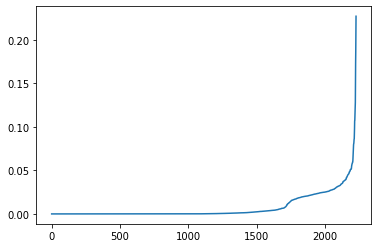

In [17]:
plt.plot(range(len(rcvs)), sorted(rcvs))

In [178]:
rcvs=np.array( [0.1043918, 0.0204639, 0.0069832, 0.0159812, 0.0000617, 0.0000201, 0.0064600, 0.0228719, 0.0000169, 0.0000131, 0.0000121, 0.0000141, 0.0056310, 0.0026900, 0.0212331, 0.0000382, 0.0000179, 0.0000350, 0.0000162, 0.0000139, 0.0016129, 0.0029531, 0.0028608, 0.0009169, 0.0204959, 0.0000151, 0.0000141, 0.0000389, 0.0000150, 0.0000131, 0.0000119, 0.0026791, 0.0021021, 0.0009108, 0.0018029, 0.0091069, 0.0000150, 0.0000141, 0.0002360, 0.0026130, 0.0017052, 0.0004540, 0.0021102, 0.0220113, 0.0000141, 0.0000122, 0.0000107, 0.0000110, 0.0000098, 0.0000141, 0.0000140, 0.0019920, 0.0014441, 0.0027168, 0.0001349, 0.0005121, 0.0121827, 0.0000141, 0.0000110, 0.0000109, 0.0021109, 0.0008450, 0.0003431, 0.0027592, 0.0004439, 0.0000529, 0.0210118, 0.0000150, 0.0000110, 0.0000101, 0.0000100, 0.0000100, 0.0000102, 0.0000151, 0.0000129, 0.0000281, 0.0000139, 0.0000129, 0.0000119, 0.0000122, 0.0000141, 0.0010760, 0.0033601, 0.0004020, 0.0007648, 0.0031180, 0.0001030, 0.0001243, 0.0019150, 0.0005250, 0.0331469, 0.0000188, 0.0000140, 0.0000138, 0.0000126, 0.0000131, 0.0000140, 0.0000126, 0.0009332, 0.0010478, 0.0028313, 0.0000288, 0.0020432, 0.0000151, 0.0000109, 0.0013082, 0.0052957, 0.0000241, 0.0021252, 0.0030012, 0.0010192, 0.0000150, 0.0037830, 0.0004141, 0.0027151, 0.0000182, 0.0358160, 0.0000141, 0.0000179, 0.0000110, 0.0000112, 0.0000100, 0.0000138, 0.0000140, 0.0000131, 0.0021932, 0.0025361, 0.0001399, 0.0028150, 0.0001112, 0.0180967, 0.0000143, 0.0000110, 0.0000100, 0.0000100, 0.0000089, 0.0000148, 0.0000119, 0.0000159, 0.0138621, 0.0000148, 0.0000110, 0.0000141, 0.0026266, 0.0135300, 0.0000209, 0.0000109, 0.0000100, 0.0000097, 0.0000138, 0.0000141, 0.0000162, 0.0013272, 0.0007503, 0.0014708, 0.0013890, 0.0000260, 0.0014410, 0.0012731, 0.0038929, 0.0004529, 0.0006950, 0.0133541, 0.0000190, 0.0000121, 0.0000110, 0.0000139, 0.0000129, 0.0000210, 0.0011511, 0.0002067, 0.0004008, 0.0032131, 0.0000849, 0.0013950, 0.0213072, 0.0000172, 0.0000141, 0.0000131, 0.0000129, 0.0000131, 0.0000128, 0.0000121, 0.0006180, 0.0037420, 0.0003979, 0.0023408, 0.0017011, 0.0211069, 0.0000220, 0.0000153, 0.0000128, 0.0000119, 0.0000129, 0.0000131, 0.0000128, 0.0000122, 0.0034151, 0.0000178, 0.0000138, 0.0050590, 0.0017102, 0.0247870, 0.0000181, 0.0000122, 0.0000110, 0.0000331, 0.0000150, 0.0000129, 0.0000131, 0.0000129, 0.0119009, 0.0000210, 0.0303743, 0.0000162, 0.0000119, 0.0000178, 0.0000141, 0.0000128, 0.0000128, 0.0000119, 0.0043182, 0.0001762, 0.0008252, 0.0019410, 0.0021241, 0.0001302, 0.0008259, 0.0000770, 0.0020943, 0.0042390, 0.0037041, 0.0361070, 0.0000181, 0.0000147, 0.0000129, 0.0000341, 0.0000150, 0.0000119, 0.0000169, 0.0000141, 0.0023151, 0.0000138, 0.0009411, 0.0014279, 0.0028968, 0.0001040, 0.0004471, 0.0133297, 0.0000198, 0.0000121, 0.0000110, 0.0000119, 0.0004911, 0.0008378, 0.0021081, 0.0007958, 0.0004859, 0.0030191, 0.0004690, 0.0178700, 0.0000150, 0.0000121, 0.0000121, 0.0000100, 0.0000139, 0.0000172, 0.0000119, 0.0000147, 0.0035259, 0.0009699, 0.0016470, 0.0007587, 0.0000162, 0.0172062, 0.0000141, 0.0000131, 0.0000179, 0.0000153, 0.0000138, 0.0000141, 0.0000179, 0.0021372, 0.0010150, 0.0015178, 0.0000839, 0.0001650, 0.0004280, 0.0019777, 0.0000739, 0.0001170, 0.0191701, 0.0000160, 0.0000141, 0.0000129, 0.0000110, 0.0000089, 0.0000110, 0.0000119, 0.0023451, 0.0000169, 0.0029171, 0.0024331, 0.0007351, 0.0249290, 0.0000193, 0.0000153, 0.0000141, 0.0000131, 0.0000132, 0.0035878, 0.0003040, 0.0032771, 0.0015712, 0.0206211, 0.0000131, 0.0000162, 0.0000109, 0.0000129, 0.0000141, 0.0000121, 0.0000119, 0.0026171, 0.0004220, 0.0008749, 0.0001070, 0.0048468, 0.0000267, 0.0000129, 0.0000098, 0.0000100, 0.0000138, 0.0000131, 0.0000132, 0.0000131, 0.0000129, 0.0038929, 0.0000179, 0.0000160, 0.0035179, 0.0001991, 0.0020449, 0.0163703, 0.0000140, 0.0000150, 0.0000109, 0.0000140, 0.0000100, 0.0000110, 0.0000100, 0.0000150, 0.0026340, 0.0002661, 0.0015869, 0.0000761, 0.0006459, 0.0009131, 0.0000152, 0.0161779, 0.0000138, 0.0000109, 0.0000110, 0.0000110, 0.0000100, 0.0000097, 0.0000100, 0.0031140, 0.0001700, 0.0002051, 0.0008173, 0.0005372, 0.0003700, 0.0025370, 0.0000899, 0.0005297, 0.0000432, 0.0000131, 0.0000112, 0.0000100, 0.0000098, 0.0007213, 0.0000181, 0.0000141, 0.0024269, 0.0000779, 0.0012960, 0.0015455, 0.0011811, 0.0254399, 0.0000157, 0.0000150, 0.0000100, 0.0000141, 0.0000141, 0.0004749, 0.0015080, 0.0000768, 0.0000157, 0.0004811, 0.0018511, 0.0002841, 0.0000159, 0.0026841, 0.0194102, 0.0000210, 0.0000160, 0.0000148, 0.0000210, 0.0000151, 0.0000150, 0.0000131, 0.0014650, 0.0006223, 0.0008359, 0.0008860, 0.0029659, 0.0023680, 0.0168681, 0.0000169, 0.0000140, 0.0000131, 0.0000116, 0.0000131, 0.0000119, 0.0008378, 0.0008491, 0.0048981, 0.0012739, 0.0012763, 0.0000920, 0.0026891, 0.0018933, 0.0013151, 0.0002208, 0.0009518, 0.0004227, 0.0384409, 0.0000222, 0.0000098, 0.0000129, 0.0000141, 0.0000138, 0.0000131, 0.0000129, 0.0000122, 0.0029872, 0.0049877, 0.0020948, 0.0003290, 0.0184319, 0.0000210, 0.0000138, 0.0000129, 0.0000110, 0.0000122, 0.0000100, 0.0000100, 0.0000110, 0.0014839, 0.0026789, 0.0026450, 0.0010380, 0.0001001, 0.0144250, 0.0000171, 0.0000140, 0.0000110, 0.0000109, 0.0000088, 0.0000138, 0.0017732, 0.0017359, 0.0007532, 0.0015550, 0.0026660, 0.0148330, 0.0000141, 0.0000110, 0.0000141, 0.0000131, 0.0000119, 0.0000167, 0.0000119, 0.0027039, 0.0010409, 0.0004368, 0.0018859, 0.0020637, 0.0002852, 0.0156140, 0.0000132, 0.0000160, 0.0000110, 0.0000141, 0.0000129, 0.0000131, 0.0019021, 0.0004401, 0.0019510, 0.0003293, 0.0014108, 0.0019729, 0.0002361, 0.0188627, 0.0000112, 0.0000070, 0.0000081, 0.0000081, 0.0000069, 0.0000069, 0.0000060, 0.0010682, 0.0025370, 0.0002089, 0.0010428, 0.0000489, 0.0012211, 0.0014551, 0.0011222, 0.0000221, 0.0000131, 0.0000119, 0.0000100, 0.0000100, 0.0000141, 0.0000129, 0.0052801, 0.0001581, 0.0033081, 0.0000147, 0.0126569, 0.0000139, 0.0000110, 0.0000112, 0.0000100, 0.0000100, 0.0000101, 0.0000100, 0.0010960, 0.0012586, 0.0011029, 0.0004358, 0.0022121, 0.0023601, 0.0155053, 0.0000172, 0.0000151, 0.0000131, 0.0000141, 0.0000172, 0.0000127, 0.0007331, 0.0010450, 0.0018740, 0.0033390, 0.0234148, 0.0000150, 0.0000112, 0.0000112, 0.0000131, 0.0000110, 0.0000141, 0.0000110, 0.0011029, 0.0055301, 0.0015560, 0.0253201, 0.0000191, 0.0000119, 0.0000159, 0.0000220, 0.0000140, 0.0008991, 0.0019951, 0.0007438, 0.0007651, 0.0005081, 0.0024400, 0.0005329, 0.0220690, 0.0000183, 0.0000150, 0.0000231, 0.0000131, 0.0000121, 0.0000131, 0.0017710, 0.0004680, 0.0004270, 0.0030801, 0.0000131, 0.0007561, 0.0139403, 0.0000162, 0.0000141, 0.0000150, 0.0000131, 0.0016141, 0.0019199, 0.0004130, 0.0023492, 0.0019808, 0.0011230, 0.0000410, 0.0000160, 0.0006390, 0.0339269, 0.0000159, 0.0000110, 0.0000150, 0.0000100, 0.0000150, 0.0000179, 0.0023351, 0.0018361, 0.0012009, 0.0028431, 0.0008456, 0.0000398, 0.0000131, 0.0000112, 0.0000093, 0.0000110, 0.0000109, 0.0005181, 0.0018020, 0.0020700, 0.0012991, 0.0034291, 0.0000184, 0.0042451, 0.0000178, 0.0013302, 0.0023670, 0.0006771, 0.0044821, 0.0000221, 0.0021320, 0.0000542, 0.0000372, 0.0000153, 0.0000141, 0.0000131, 0.0000131, 0.0000129, 0.0000109, 0.0035641, 0.0008311, 0.0002131, 0.0024441, 0.0069492, 0.0000179, 0.0032329, 0.0006609, 0.0009911, 0.0035871, 0.0000169, 0.0318239, 0.0000811, 0.0000162, 0.0000122, 0.0000112, 0.0000109, 0.0000100, 0.0000101, 0.0000131, 0.0041659, 0.0000159, 0.0001481, 0.0014980, 0.0020680, 0.0189882, 0.0000131, 0.0000138, 0.0000141, 0.0000132, 0.0000122, 0.0000120, 0.0000148, 0.0026367, 0.0009191, 0.0024851, 0.0000310, 0.0000169, 0.0023501, 0.0167311, 0.0000141, 0.0000131, 0.0000119, 0.0000148, 0.0000160, 0.0000122, 0.0000138, 0.0000129, 0.0003500, 0.0019877, 0.0013761, 0.0012428, 0.0034830, 0.0001483, 0.0000210, 0.0000119, 0.0000110, 0.0000152, 0.0000139, 0.0000129, 0.0000131, 0.0044376, 0.0004192, 0.0012018, 0.0010522, 0.0016839, 0.0149698, 0.0000140, 0.0000120, 0.0000100, 0.0000108, 0.0000162, 0.0000100, 0.0000131, 0.0032790, 0.0006318, 0.0005000, 0.0030689, 0.0000171, 0.0124850, 0.0000160, 0.0000129, 0.0000131, 0.0000152, 0.0017002, 0.0006280, 0.0004189, 0.0026722, 0.0011439, 0.0002670, 0.0216870, 0.0000148, 0.0000109, 0.0000171, 0.0000100, 0.0000088, 0.0000160, 0.0000141, 0.0000128, 0.0019650, 0.0005498, 0.0006390, 0.0000901, 0.0015991, 0.0014682, 0.0001659, 0.0208652, 0.0000150, 0.0000129, 0.0000102, 0.0000100, 0.0000088, 0.0000097, 0.0000141, 0.0032897, 0.0000601, 0.0000141, 0.0010380, 0.0003173, 0.0029788, 0.0125010, 0.0000129, 0.0000100, 0.0000112, 0.0000101, 0.0000141, 0.0000170, 0.0011073, 0.0012231, 0.0020070, 0.0048180, 0.0003168, 0.0009211, 0.0046620, 0.0006380, 0.0007620, 0.0054399, 0.0001099, 0.0023608, 0.0002661, 0.0011027, 0.0429358, 0.0000150, 0.0000112, 0.0000112, 0.0000100, 0.0000102, 0.0000100, 0.0000101, 0.0000129, 0.0047028, 0.0008380, 0.0002358, 0.0270278, 0.0000141, 0.0000119, 0.0000138, 0.0000141, 0.0000150, 0.0000131, 0.0000131, 0.0000129, 0.0039322, 0.0000160, 0.0000141, 0.0029817, 0.0000189, 0.0005729, 0.0161128, 0.0000169, 0.0000241, 0.0000184, 0.0000138, 0.0000141, 0.0000141, 0.0015158, 0.0000170, 0.0021100, 0.0020969, 0.0010629, 0.0001722, 0.0012691, 0.0196221, 0.0000210, 0.0000128, 0.0000112, 0.0000131, 0.0000138, 0.0000131, 0.0015261, 0.0000422, 0.0018742, 0.0005512, 0.0012789, 0.0004051, 0.0012920, 0.0013221, 0.0170047, 0.0000131, 0.0000152, 0.0000121, 0.0000131, 0.0000129, 0.0000122, 0.0000179, 0.0050292, 0.0014942, 0.0012018, 0.0215080, 0.0000138, 0.0000109, 0.0000131, 0.0000150, 0.0000131, 0.0000129, 0.0000131, 0.0009260, 0.0021329, 0.0019841, 0.0012150, 0.0001852, 0.0195380, 0.0000150, 0.0000188, 0.0000112, 0.0000100, 0.0000089, 0.0000100, 0.0000119, 0.0039098, 0.0000760, 0.0001978, 0.0006583, 0.0029351, 0.0000170, 0.0124280, 0.0000172, 0.0000209, 0.0000129, 0.0000147, 0.0017328, 0.0006962, 0.0006061, 0.0017862, 0.0006237, 0.0013446, 0.0011359, 0.0002789, 0.0204961, 0.0000160, 0.0000112, 0.0000112, 0.0000160, 0.0000100, 0.0000121, 0.0000148, 0.0000138, 0.0039781, 0.0014498, 0.0008282, 0.0010049, 0.0012541, 0.0110478, 0.0000119, 0.0000120, 0.0000110, 0.0000121, 0.0030601, 0.0002332, 0.0006127, 0.0003750, 0.0027308, 0.0013161, 0.0000179, 0.0204899, 0.0000200, 0.0000139, 0.0000119, 0.0000157, 0.0000122, 0.0000119, 0.0000109, 0.0011590, 0.0030871, 0.0004831, 0.0036180, 0.0008130, 0.0216079, 0.0000179, 0.0000120, 0.0000119, 0.0000150, 0.0000128, 0.0000131, 0.0000110, 0.0035351, 0.0002468, 0.0002398, 0.0033391, 0.0002222, 0.0008201, 0.0201440, 0.0000181, 0.0000200, 0.0000112, 0.0000110, 0.0000150, 0.0000100, 0.0000091, 0.0007789, 0.0004739, 0.0004211, 0.0007517, 0.0006810, 0.0006692, 0.0000139, 0.0006862, 0.0001250, 0.0004830, 0.0006747, 0.0006940, 0.0006080, 0.0000141, 0.0000150, 0.0003690, 0.0102427, 0.0000148, 0.0000129, 0.0000141, 0.0000138, 0.0000119, 0.0005068, 0.0003788, 0.0005820, 0.0007131, 0.0000141, 0.0010700, 0.0004811, 0.0000679, 0.0000568, 0.0006797, 0.0005862, 0.0000232, 0.0007000, 0.0003582, 0.0000538, 0.0007050, 0.0004260, 0.0001521, 0.0000241, 0.0000107, 0.0000091, 0.0000091, 0.0000121, 0.0000090, 0.0000091, 0.0000110, 0.0000122, 0.0006023, 0.0006969, 0.0000150, 0.0005960, 0.0000791, 0.0006128, 0.0000139, 0.0000132, 0.0004492, 0.0000147, 0.0000131, 0.0004880, 0.0000532, 0.0000330, 0.0004292, 0.0001033, 0.0000119, 0.0004463, 0.0000420, 0.0000210, 0.0002019, 0.0002880, 0.0000611, 0.0002069, 0.0000241, 0.0003729, 0.0000140, 0.0000120, 0.0000119, 0.0155599, 0.0000163, 0.0000120, 0.0000110, 0.0000110, 0.0000109, 0.0000101, 0.0000100, 0.0000132, 0.0000798, 0.0039289, 0.0000122, 0.0000097, 0.0000119, 0.0003938, 0.0000131, 0.0001840, 0.0001061, 0.0000310, 0.0000119, 0.0004737, 0.0000778, 0.0000231, 0.0002459, 0.0004270, 0.0039452, 0.0005360, 0.0188558, 0.0000109, 0.0000088, 0.0000100, 0.0236590, 0.0000258, 0.0140588, 0.0243499, 0.0192461, 0.0249131, 0.0001431, 0.0000630, 0.0359270, 0.0000670, 0.0392680, 0.0206843, 0.0204899, 0.0013342, 0.0000450, 0.0004599, 0.0000887, 0.0000489, 0.0236910, 0.0314350, 0.0433552, 0.0315118, 0.0467477, 0.0227332, 0.0199208, 0.0230262, 0.0217779, 0.0294609, 0.0264089, 0.0233030, 0.0000610, 0.0000532, 0.0225060, 0.0180657, 0.0000790, 0.0000439, 0.0182509, 0.0001490, 0.0000808, 0.0749519, 0.0000450, 0.0000987, 0.0164070, 0.0001061, 0.0000651, 0.0213859, 0.0000501, 0.0000650, 0.0000498, 0.0166988, 0.0000570, 0.0408718, 0.0000420, 0.0000412, 0.0000662, 0.0037770, 0.0011659, 0.0000401, 0.0026598, 0.0000711, 0.0073609, 0.0000231, 0.0000629, 0.0001800, 0.0000748, 0.0000579, 0.0000682, 0.0001270, 0.0301509, 0.0000673, 0.0000258, 0.0000718, 0.0000830, 0.0001407, 0.0000712, 0.0001292, 0.0000598, 0.0000849, 0.0226350, 0.0208566, 0.0000441, 0.0000908, 0.0186599, 0.0000658, 0.0209341, 0.0000582, 0.0161261, 0.0000610, 0.0000792, 0.0114882, 0.0000419, 0.0204579, 0.0252290, 0.0182452, 0.0000551, 0.0000801, 0.0210622, 0.0000460, 0.0290568, 0.0116920, 0.0162680, 0.0000441, 0.0244870, 0.0000532, 0.0173218, 0.0000620, 0.0000403, 0.0159590, 0.0000449, 0.0000489, 0.0000704, 0.0207229, 0.0000439, 0.0000432, 0.0167048, 0.0000229, 0.0000501, 0.0377001, 0.0169762, 0.0285640, 0.0082121, 0.0000772, 0.0001228, 0.0000770, 0.0001352, 0.0000849, 0.0000598, 0.0000591, 0.0000822, 0.0000551, 0.0000560, 0.0002511, 0.0285979, 0.0277650, 0.0003879, 0.0071020, 0.0001001, 0.0073390, 0.0199020, 0.0048860, 0.0206852, 0.0037880, 0.0636571, 0.0000520, 0.0000420, 0.0342018, 0.0236070, 0.0000520, 0.0165310, 0.0082441, 0.0000748, 0.0195999, 0.0236059, 0.0385031, 0.0239758, 0.0000401, 0.0000789, 0.0288582, 0.0000401, 0.0000512, 0.0012443, 0.0000591, 0.0000508, 0.0015590, 0.0000472, 0.0000489, 0.0000681, 0.0005009, 0.0000538, 0.0000480, 0.0000809, 0.0000620, 0.0173859, 0.0000748, 0.0003667, 0.0000882, 0.0000513, 0.0000741, 0.0023709, 0.0000687, 0.0363610, 0.0000420, 0.0000560, 0.0034609, 0.0000722, 0.0070560, 0.0000560, 0.0257612, 0.0064271, 0.0044859, 0.0000500, 0.0041318, 0.0000827, 0.0000751, 0.0000388, 0.0000520, 0.0055642, 0.0060220, 0.0055559, 0.0000551, 0.0000718, 0.0000467, 0.0434189, 0.0049248, 0.0000479, 0.0000661, 0.0051902, 0.0198653, 0.0380888, 0.0413802, 0.0153100, 0.0000551, 0.0260742, 0.0168249, 0.0000572, 0.0043230, 0.0000660, 0.0036900, 0.0000659, 0.0000451, 0.0000660, 0.0000519, 0.0000420, 0.0003697, 0.0000520, 0.0000691, 0.0084650, 0.0060089, 0.0463612, 0.0236068, 0.0001050, 0.0182331, 0.0000481, 0.0261840, 0.0000710, 0.0133741, 0.0000210, 0.0221810, 0.0000561, 0.0167108, 0.0000722, 0.0000708, 0.0113993, 0.0000401, 0.0205629, 0.0000599, 0.0000439, 0.0000460, 0.0000682, 0.0518060, 0.0000629, 0.0133872, 0.0031481, 0.0000432, 0.0000441, 0.0000520, 0.0060317, 0.0000670, 0.0000620, 0.0164552, 0.0041646, 0.0000530, 0.0081830, 0.0296750, 0.0283961, 0.0002220, 0.0306702, 0.0251060, 0.0159691, 0.0249209, 0.0032420, 0.0094753, 0.0000560, 0.0000450, 0.0236883, 0.0000541, 0.0000472, 0.0011630, 0.0000539, 0.0024531, 0.0000770, 0.0004451, 0.0267871, 0.0000446, 0.0169559, 0.0067968, 0.0005589, 0.0000431, 0.0005381, 0.0000448, 0.0000460, 0.0052600, 0.0283701, 0.0455170, 0.0234110, 0.0002561, 0.0002388, 0.0000658, 0.0226049, 0.0223806, 0.0188430, 0.0258040, 0.0041668, 0.0213821, 0.0221188, 0.0219841, 0.0263352, 0.0175900, 0.0292643, 0.0303769, 0.0124290, 0.0000539, 0.0000498, 0.0000482, 0.0000701, 0.0350671, 0.0253739, 0.0197330, 0.0259342, 0.0229499, 0.0198531, 0.0275950, 0.0174448, 0.0224719, 0.0380662, 0.0173430, 0.0171409, 0.0000620, 0.0008781, 0.0333819, 0.0295758, 0.0013850, 0.0000989, 0.0057562, 0.0267880, 0.0211990, 0.0250502, 0.0210808, 0.0175371, 0.0260680, 0.0187557, 0.0268688, 0.0270150, 0.0000460, 0.0419581, 0.0000429, 0.0235749, 0.0005731, 0.0000420, 0.0000749, 0.0000789, 0.0000372, 0.0002151, 0.0000460, 0.0027539, 0.0021582, 0.0000567, 0.0312161, 0.0000379, 0.0000722, 0.0000491, 0.0362220, 0.0000508, 0.0000611, 0.0389460, 0.0265298, 0.0070143, 0.0042072, 0.0000598, 0.0000689, 0.0001111, 0.0261882, 0.0084329, 0.0002370, 0.0229431, 0.0014758, 0.0001810, 0.0399883, 0.0053849, 0.0000489, 0.0199072, 0.0000620, 0.0000398, 0.0039928, 0.0175300, 0.0000589, 0.0000441, 0.0345159, 0.0000789, 0.0014801, 0.0305480, 0.0044160, 0.0288823, 0.0152101, 0.0224490, 0.0234070, 0.0000868, 0.0255132, 0.0324709, 0.0016110, 0.0000441, 0.0264051, 0.0000391, 0.0000889, 0.0000799, 0.0000777, 0.0000482, 0.0155549, 0.0001108, 0.0234740, 0.0000429, 0.0305321, 0.0221979, 0.0255811, 0.0000619, 0.0189459, 0.0000468, 0.0142310, 0.0000560, 0.0000450, 0.0000558, 0.0000680, 0.0000610, 0.0000451, 0.0000494, 0.0005059, 0.0211001, 0.0000839, 0.0192609, 0.0000411, 0.0000920, 0.0150878, 0.0000730, 0.0004881, 0.0000689, 0.0000441, 0.0343101, 0.0000541, 0.0000422, 0.0000530, 0.0167523, 0.0000451, 0.0000429, 0.0000630, 0.0000407, 0.0156989, 0.0000458, 0.0202398, 0.0312058, 0.0232210, 0.0000441, 0.0439498, 0.0001741, 0.0030710, 0.0003609, 0.0000601, 0.0001779, 0.0000720, 0.0141377, 0.0307248, 0.0000918, 0.0000619, 0.0277670, 0.0001328, 0.0000520, 0.0000470, 0.0000429, 0.0000441, 0.0203490, 0.0156550, 0.0000539, 0.0148530, 0.0000360, 0.0000520, 0.0197089, 0.0000422, 0.0000551, 0.0000760, 0.0000430, 0.0000489, 0.0000469, 0.0001009, 0.0382769, 0.0239639, 0.0000979, 0.0233540, 0.0281951, 0.0226040, 0.0274050, 0.0117671, 0.0267792, 0.0165360, 0.0275240, 0.0218067, 0.0294347, 0.0200672, 0.0000689, 0.0000608, 0.0000629, 0.0000682, 0.0000619, 0.0000898, 0.0000599, 0.0000599, 0.0000600, 0.0000604, 0.0000701, 0.0000598, 0.0197561, 0.0233390, 0.0000701, 0.0000599, 0.0000604, 0.0000610, 0.0000589, 0.0000538, 0.0000579, 0.0164838, 0.0031471, 0.0000608, 0.0000572, 0.0000570, 0.0302289, 0.0237110, 0.0000248, 0.0226190, 0.0165970, 0.0239990, 0.0239789, 0.0184541, 0.0000432, 0.0000458, 0.0364049, 0.0409679, 0.0194929, 0.0055831, 0.0158920, 0.0002100, 0.0025921, 0.0000891, 0.0274779, 0.0182431, 0.0225492, 0.0274460, 0.0017242, 0.0016060, 0.0000460, 0.0234711, 0.0000439, 0.0000248, 0.0000560, 0.0186558, 0.0000389, 0.0000438, 0.0284720, 0.0212879, 0.0223558, 0.0034562, 0.0000379, 0.0269323, 0.0261030, 0.0021541, 0.0000429, 0.0307641, 0.0058613, 0.0000451, 0.0000682, 0.0196920, 0.0319040, 0.0493780, 0.0226271, 0.0049081, 0.0184820, 0.0137189, 0.0000479, 0.0271299, 0.0191450, 0.0172679, 0.0301058, 0.0100129, 0.0000849, 0.0009150, 0.0261598, 0.0237119, 0.0359471, 0.0549789, 0.0329222, 0.0405119, 0.0245728, 0.0236339, 0.0204260, 0.0171761, 0.0246139, 0.0169899, 0.0248320, 0.0264329, 0.0000879, 0.0000619, 0.0000770, 0.0277130, 0.0000589, 0.0226950, 0.0107348, 0.0255740, 0.0244558, 0.0175328, 0.0308189, 0.0232511, 0.0256848, 0.0063309, 0.0263879, 0.0057092, 0.0169069, 0.0272799, 0.0195930, 0.0284300, 0.0258770, 0.0290523, 0.0233038, 0.0000293, 0.0470000, 0.0000511, 0.0296252, 0.0138939, 0.0202420, 0.0203750, 0.0367179, 0.0000489, 0.0000251, 0.0250668, 0.0000541, 0.0000739, 0.0026591, 0.0085189, 0.0199740, 0.0159178, 0.0000660, 0.0063498, 0.0403111, 0.0331791, 0.0497499, 0.0004599, 0.0000429, 0.0061531, 0.0055721, 0.0047080, 0.0000532, 0.0394390, 0.0021498, 0.0000570, 0.0000691, 0.0018559, 0.0000739, 0.0087912, 0.0000510, 0.0000679, 0.0276410, 0.0285902, 0.0243390, 0.0157029, 0.0289579, 0.0195839, 0.0000412, 0.0193920, 0.0181329, 0.0000398, 0.0201559, 0.0000792, 0.0155390, 0.0000480, 0.0207910, 0.0000901, 0.0000410, 0.0000250, 0.0000782, 0.0000501, 0.0000482, 0.0000839, 0.0000651, 0.0484700, 0.0015328, 0.0001478, 0.0000690, 0.0572841, 0.0021372, 0.0298229, 0.0001960, 0.0000519, 0.0240629, 0.0216668, 0.0000729, 0.0234719, 0.0161731, 0.0000472, 0.0204873, 0.0173209, 0.0252407, 0.0176587, 0.0001149, 0.0000601, 0.0000398, 0.0000592, 0.0419361, 0.0276489, 0.0122618, 0.0000420, 0.0007141, 0.0000448, 0.0000773, 0.0000429, 0.0202052, 0.0140679, 0.0000489, 0.0000742, 0.0216920, 0.0000450, 0.0000420, 0.0196543, 0.0266218, 0.0158500, 0.0000460, 0.0000481, 0.0382173, 0.0000462, 0.0000712, 0.0000649, 0.0000622, 0.0000620, 0.0000580, 0.0000613, 0.0000660, 0.0000629, 0.0000619, 0.0227621, 0.0000730, 0.0001960, 0.0000592, 0.0000589, 0.0000592, 0.0000592, 0.0000610, 0.0000641, 0.0162170, 0.0032222, 0.0000558, 0.0001591, 0.0244791, 0.0003789, 0.0000241, 0.0182380, 0.0000537, 0.0251479, 0.0036931, 0.0430010, 0.0000420, 0.0000968, 0.0224553, 0.0000422, 0.0000529, 0.0410082, 0.0039830, 0.0000799, 0.0021028, 0.0000558, 0.0032229, 0.0080099, 0.0149581, 0.0559118, 0.0000398, 0.0001590, 0.0047572, 0.0043289, 0.0000450, 0.0000432, 0.0000408, 0.0267560, 0.0323379, 0.0360188, 0.0146232, 0.0262900, 0.0184932, 0.0221310, 0.0298099, 0.0231931, 0.0000798, 0.0184789, 0.0000939, 0.0000181, 0.0000369, 0.0000441, 0.0388539, 0.0000458, 0.0440791, 0.0000799, 0.0232351, 0.0217390, 0.0234527, 0.0206699, 0.0000691, 0.0164690, 0.0231948, 0.0366661, 0.0184651, 0.0245812, 0.0001932, 0.0238631, 0.0340021, 0.0305758, 0.0000419, 0.0000890, 0.0350928, 0.0387268, 0.0256240, 0.0152788, 0.0000541, 0.0220001, 0.0157339, 0.0169301, 0.0000420, 0.0000451, 0.0068607, 0.0005269, 0.0000911, 0.0492502, 0.0425341, 0.0000901, 0.0000510, 0.0001669, 0.0001662, 0.0078330, 0.0072730, 0.0000680, 0.0269249, 0.0001381, 0.0000420, 0.0000708, 0.0363359, 0.0000503, 0.0000451, 0.0000468, 0.0000510, 0.0000871, 0.0298751, 0.0195830, 0.0090380, 0.0312071, 0.0202234, 0.0092631, 0.0003759, 0.0001421, 0.0000481, 0.0000488, 0.0000570, 0.0000608, 0.0000589, 0.0000441, 0.0000419, 0.0000491, 0.0182250, 0.0227120, 0.0546060, 0.0000481, 0.0000561, 0.0538900, 0.0059452, 0.0196269, 0.0000379, 0.0000892, 0.0000367, 0.0000462, 0.0000570, 0.0000479, 0.0017312, 0.0000760, 0.0049150, 0.0054691, 0.0000899, 0.0000522, 0.0000410, 0.0000949, 0.0126440, 0.0199311, 0.0267589, 0.0177422, 0.0479579, 0.0000701, 0.0042651, 0.0000450, 0.0230701, 0.0259960, 0.0013330, 0.0000369, 0.0064252, 0.0059850, 0.0000570, 0.0069671, 0.0136240, 0.0359130, 0.0293210, 0.0043320, 0.0000510, 0.0004780, 0.0000380, 0.0055719, 0.0023780, 0.0000460, 0.0000411, 0.0208943, 0.0123279, 0.0296256, 0.0363689, 0.0009129, 0.0000510, 0.0192809, 0.0080988, 0.0837481, 0.0000898, 0.0158747, 0.0000370, 0.0000479, 0.0000920, 0.0281320, 0.0044233, 0.0047268, 0.0000450, 0.0000920, 0.0008800, 0.0277171, 0.0000370, 0.0000648, 0.0271361, 0.0055890, 0.0004511, 0.0000651, 0.0000930, 0.0399499, 0.0000722, 0.0239401, 0.0221741, 0.0220370, 0.0257199, 0.0189481, 0.0000457, 0.0298369, 0.0177238, 0.0289290, 0.0161898, 0.0249889, 0.0158329, 0.0000508, 0.0000420, 0.0000451, 0.0000450, 0.0424869, 0.0036362, 0.0000961, 0.0000558, 0.0000579, 0.0511341, 0.0003969, 0.0001672, 0.0020222, 0.0000541, 0.0000460, 0.0000508, 0.0071960, 0.0000482, 0.0000420, 0.0027279, 0.0179798, 0.0000379, 0.0000379, 0.0364770, 0.0012260, 0.0003000, 0.0001061, 0.0269990, 0.0265780, 0.0180440, 0.0191739, 0.0228901, 0.0000561, 0.0219751, 0.0000761, 0.0001311, 0.0000510, 0.0396421, 0.0367392, 0.0238921, 0.0000861, 0.0195920, 0.0230522, 0.0165302, 0.0000360, 0.0000393, 0.0000608, 0.0001471, 0.0000460, 0.0000729, 0.0225942, 0.0206148, 0.0001340, 0.0026603, 0.0000429, 0.0269158, 0.0124187, 0.0000394, 0.0000529, 0.0000451, 0.0207071, 0.0325303, 0.0000839, 0.0496531, 0.0233061, 0.0179760, 0.0204439, 0.0185661, 0.0262282, 0.0267150, 0.0244203, 0.0075519, 0.0050872, 0.0000450, 0.0000613, 0.0174191, 0.0071292, 0.0065281, 0.0134368, 0.0000422, 0.0013499, 0.0290379, 0.0230160, 0.0000551, 0.0079019, 0.0238273, 0.0218730, 0.0289962, 0.0000419, 0.0000511, 0.0249107, 0.0179150, 0.0139830, 0.0000811, 0.0000908, 0.0438750, 0.0175061, 0.0196631, 0.0320911, 0.0281501, 0.0058561, 0.0205491, 0.0071021, 0.0084343, 0.0053389, 0.0056000, 0.0086050, 0.0000391, 0.0000451, 0.0000450, 0.0000930, 0.0181138, 0.0335810, 0.0214021, 0.0192230] )
rcvl=np.array( [45, 632, 45, 45, 632, 74, 74, 632, 45, 45, 45, 74, 632, 45, 74, 632, 74, 632, 74, 74, 45, 632, 632, 45, 74, 74, 74, 632, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 45, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 45, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 45, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 45, 74, 74, 74, 74, 45, 74, 74, 45, 74, 74, 45, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 45, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 45, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 45, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 45, 74, 45, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 45, 45, 74, 74, 45, 74, 74, 45, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 45, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 45, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 45, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 45, 74, 45, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 45, 74, 74, 74, 74, 74, 74, 45, 45, 74, 74, 74, 74, 74, 74, 74, 74, 45, 45, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 45, 45, 45, 45, 45, 45, 74, 45, 45, 74, 45, 45, 45, 74, 45, 74, 45, 74, 45, 45, 74, 74, 45, 74, 45, 45, 74, 45, 45, 45, 74, 45, 45, 74, 45, 45, 74, 45, 45, 45, 74, 45, 45, 45, 45, 74, 45, 45, 74, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 49, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 127, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 128, 128, 128, 128, 128, 128, 49, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 128, 128, 128, 128, 128, 128, 49, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 49, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 128, 128, 128, 49, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 127, 56, 56, 56, 127, 56, 56, 56, 127, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 49, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 128, 128, 128, 128, 128, 49, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 128, 128, 128, 128, 49, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 128, 128, 49] )

In [179]:
skm = lm.LinearRegression()
# запускаем расчет параметров для указанных данных
skm.fit(rcvl.reshape(-1, 1), rcvs)
# и выведем параметры рассчитанной модели
print(skm.intercept_, skm.coef_)

0.0076543942799634805 [-1.51795035e-05]


In [180]:
def PolyCoefficients(x_, coeffs):
    return coeffs[0] + x_ * coeffs[1]

In [181]:
# [PolyCoefficients(x, curve) for i in x]
# curve[0] + x[0] + curve[1]
x = np.linspace(0,650,650)
y = np.array([curve[0] + i * curve[1] for i in x])
# for i in x:
#     curve[0] + i * curve[1]
print(y.shape)

(650,)


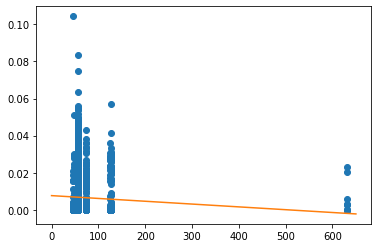

In [182]:
plt.plot(rcvl, rcvs, 'o')
# curve = np.array([skm.intercept_, skm.coef_[0]])
# x = np.linspace(0,600,600)
# y = [PolyCoefficients(x, curve) for i in x]
plt.plot(x,y)

# T and S experiments

In [183]:
times = []
T = []
S = []

with open('ts_times.csv', 'r') as f:
    for line in f.read().split('\n')[:-1]:
        time, t, s = line.split(',')
        times.append(time)
        T.append(t)
        S.append(s)

In [165]:
times=np.array([[129.4729111, 131.8555803, 127.116679, 125.7976611, 130.7856309, 130.1786809],
                [84.1775661, 85.2433839, 84.1054211, 83.69502, 85.1299891, 83.5983319],
                [76.4418001, 75.015857, 75.0450251, 71.771966, 70.3343251, 72.0694802],
                [63.9895532, 64.806653, 62.729815, 63.4565861, 67.4451718, 62.4741929],
                [56.817168, 57.1562319, 57.259331, 57.4594152, 60.7733812, 55.7431228],
                [51.5355542, 51.798152, 51.0681889, 52.0303102, 52.2785709, 50.9928308],
                [47.6613021, 49.7219992, 49.4526567, 48.1863732, 47.9253509, 48.6388819],
                [45.1439323, 45.945926, 44.676631, 46.254065, 44.30948, 44.4939239]])
ts=[20, 60, 100, 140, 180, 220, 260, 300]
ss=[3, 8, 13, 18, 23, 28]
times.dtype


dtype('float64')

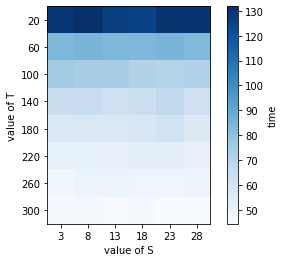

In [166]:
plt.xticks(ticks=np.arange(len(ss)),labels=ss)
plt.yticks(ticks=np.arange(len(ts)),labels=ts)
plt.xlabel('value of S')
plt.ylabel('value of T')

# save this plot inside a variable called hm
hm=plt.imshow(times, cmap='Blues',interpolation="nearest")
# pass this heatmap object into plt.colorbar method.
plt.colorbar(hm, label='time')
plt.show()

In [168]:
times=[[51.5534711, 51.0482159, 51.7387149, 53.5200481, 50.63624, 51.1068799],
       [48.7623911, 48.39168, 49.7743211, 50.2049632, 48.6567748, 47.9763479],
       [45.7029572, 46.8473742, 47.669951, 46.9967408, 46.4642711, 46.8538718],
       [44.546406, 45.3464749, 47.4590781, 43.5215659, 43.8757403, 43.8356071],
       [42.0545399, 42.235647, 42.6233442, 43.9712729, 42.5088608, 41.5491991],
       [39.8343048, 39.9089971, 40.602505, 40.1155818, 40.2395651, 39.8196161],
       [39.1635668, 40.7215161, 40.5664778, 39.2416019, 39.2986388, 40.254148]]
ts=[220, 250, 280, 310, 340, 370, 400]
ss=[13, 18, 23, 28, 33, 38]


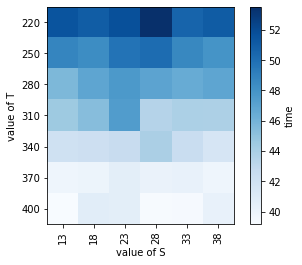

In [169]:
plt.xticks(ticks=np.arange(len(ss)),labels=ss,rotation=90)
plt.yticks(ticks=np.arange(len(ts)),labels=ts)
plt.xlabel('value of S')
plt.ylabel('value of T')

# save this plot inside a variable called hm
hm=plt.imshow(times, cmap='Blues',interpolation="nearest")
# pass this heatmap object into plt.colorbar method.
plt.colorbar(hm, label='time')
plt.show()

In [187]:
times={18: [[1.202692, 0.914175, 0.948668, 0.8714008, 0.9013689], [0.705833, 0.7971878, 0.8470638, 0.797672, 0.858088], [0.7328658, 0.7776761, 0.7983553, 0.8829482, 0.8568001], [0.748513, 0.8427372, 0.73332, 0.756454, 0.7704508], [0.8693671, 0.6865489, 0.6977789, 0.6937561, 0.7822311], [0.7160769, 0.6576481, 0.689851, 0.683543, 0.6667809], [0.6932151, 0.6561651, 0.6748059, 0.6410632, 0.7596359], [0.6682341, 0.6470671, 0.6763527, 0.72945, 0.6860521], [0.6225517, 0.679281, 0.6482151, 0.655437, 0.7050939], [0.6304178, 0.6710868, 0.6829393, 0.8593891, 0.9435041]], 20: [[2.6652758, 2.5988181, 2.8526492, 2.5939322, 2.673737], [2.4403169, 2.4284968, 2.396488, 2.4125211, 2.369704], [2.1053939, 2.107749, 2.1582839, 2.1945841, 2.2023911], [1.9777989, 2.028302, 2.0940561, 2.0797329, 2.0806999], [1.912384, 1.9297812, 1.8553181, 2.0404639, 1.9808052], [1.787025, 1.8780589, 1.9773939, 1.8239501, 1.8842812], [1.638942, 1.7453508, 1.7505658, 1.7247198, 1.99106], [1.6814959, 1.7683029, 1.734808, 2.067512, 1.8660879], [1.6400142, 1.6122439, 1.6411881, 1.652504, 1.6928253], [1.6330931, 1.6577542, 1.6605871, 1.8513548, 1.6570868]], 22: [[9.620924, 9.351743, 10.069298, 9.5829031, 9.5410261], [8.4302208, 8.4187388, 8.6560221, 8.4062419, 8.613631], [7.9471838, 7.6180279, 7.7234089, 7.6314521, 7.6385992], [6.8359578, 7.0169959, 6.8892784, 7.0981169, 7.408525], [6.5868399, 8.1822851, 6.7016518, 6.539866, 6.598043], [6.215147, 6.406414, 6.0982993, 6.232003, 6.116502], [5.8057339, 5.7833519, 5.9063239, 5.765646, 5.9456141], [5.5958862, 5.5753908, 5.666255, 5.8114779, 5.5026209], [5.4877279, 5.5696812, 5.5243261, 5.6730268, 5.5250361], [5.4108779, 5.323158, 5.367945, 5.4180582, 5.4030128]], 24: [[36.6051571, 36.1022549, 35.6186068, 35.903651, 36.854214], [32.537559, 32.2944148, 31.7545221, 32.955106, 31.6906321], [29.4157548, 28.567667, 28.5505359, 28.4987872, 28.573813], [26.0464251, 26.8918121, 27.4338701, 28.0535512, 26.605716], [24.3706501, 24.2055092, 24.61292, 24.4551578, 24.3569942], [22.6696, 23.0598593, 22.659776, 23.3073761, 23.1418941], [21.4202273, 21.3141758, 21.2720151, 21.6115887, 21.6111403], [21.0617421, 20.5921798, 20.386461, 20.5032511, 20.6062899], [20.4517419, 21.1862221, 20.8777499, 20.3127968, 20.1923552], [20.220365, 20.1855638, 20.2121761, 20.2554343, 20.11905]], 26: [[153.9077592, 147.280273, 170.6559796, 157.200269, 142.9056349], [126.9856579, 124.6816962, 124.2790589, 123.6070318, 122.2078888], [116.6338451, 139.3775268, 134.8129721, 130.4231858, 134.233001], [104.666816, 124.32795, 127.8938377, 134.1027291, 134.8748281], [142.0610759, 131.2424278, 120.8353431, 120.2708659, 112.1370199], [106.459271, 106.8011649, 106.222693, 103.4580619, 128.5742569], [122.9205449, 128.5560269, 121.5774999, 125.0932758, 118.733232], [117.515696, 113.9012082, 112.997751, 116.0975068, 112.603673], [101.8842628, 109.8403752, 114.4872191, 97.955044, 84.13076], [84.1813059, 83.5724502, 83.9034851, 79.947479, 80.7025561], [78.553534, 82.7655401, 78.741899, 79.8160269, 81.7833378]]}
ts=[100, 140, 180, 220, 260, 300, 340, 380, 420, 460, 500]
ss=[10, 15, 20, 25, 30]
ts=[100, 140, 180, 220, 260, 300, 340, 380, 420, 460, 500]
ss=[10, 15, 20, 25, 30]

In [193]:
fig, axs = plt.subplots(1, 5,figsize=(10,5))
# fig.suptitle('Speedup graphs per amount of processes groups')

for k, v in times.items():
    hm=axs[k // 2 - 9].imshow(v, cmap='Blues',interpolation="nearest")
    plt.colorbar(hm, label='time')
# axs[0].plot(y1, a1, y1, a2, y1, a3)
# axs[0].legend(('simple', 'medium', 'complex'))

# axs[1].plot(y2, a4, y2, a5, y2, a6)
# axs[1].legend(('simple', 'medium', 'complex'))

# axs[2].plot(y3, a7, y3, a8, y3, a9)
# axs[2].legend(('simple', 'medium', 'complex'))

for ax in axs.flat:
#     ax.xticks(ticks=np.arange(len(ss)),labels=ss,rotation=90)
#     ax.yticks(ticks=np.arange(len(ts)),labels=ts)
#     ax.xlabel('value of S')
#     ax.ylabel('value of T')

    ax.set(xlabel='processes amount', ylabel='speedup')

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

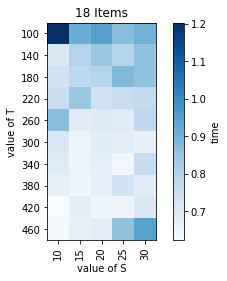

In [198]:
plt.xticks(ticks=np.arange(len(ss)),labels=ss,rotation=90)
plt.yticks(ticks=np.arange(len(ts)),labels=ts)
plt.xlabel('value of S')
plt.ylabel('value of T')

# save this plot inside a variable called hm
hm=plt.imshow(times[18], cmap='Blues',interpolation="nearest")
# pass this heatmap object into plt.colorbar method.
plt.colorbar(hm, label='time')
plt.title("18 Items")
plt.show()

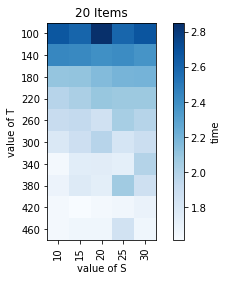

In [199]:
plt.xticks(ticks=np.arange(len(ss)),labels=ss,rotation=90)
plt.yticks(ticks=np.arange(len(ts)),labels=ts)
plt.xlabel('value of S')
plt.ylabel('value of T')

# save this plot inside a variable called hm
hm=plt.imshow(times[20], cmap='Blues',interpolation="nearest")
# pass this heatmap object into plt.colorbar method.
plt.colorbar(hm, label='time')
plt.title("20 Items")
plt.show()

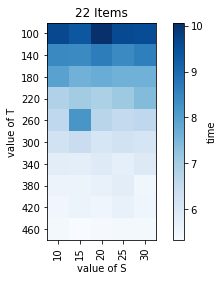

In [200]:
plt.xticks(ticks=np.arange(len(ss)),labels=ss,rotation=90)
plt.yticks(ticks=np.arange(len(ts)),labels=ts)
plt.xlabel('value of S')
plt.ylabel('value of T')

# save this plot inside a variable called hm
hm=plt.imshow(times[22], cmap='Blues',interpolation="nearest")
# pass this heatmap object into plt.colorbar method.
plt.colorbar(hm, label='time')
plt.title("22 Items")
plt.show()

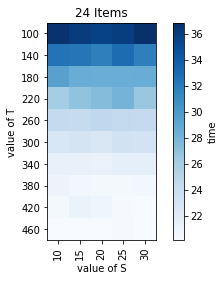

In [201]:
plt.xticks(ticks=np.arange(len(ss)),labels=ss,rotation=90)
plt.yticks(ticks=np.arange(len(ts)),labels=ts)
plt.xlabel('value of S')
plt.ylabel('value of T')

# save this plot inside a variable called hm
hm=plt.imshow(times[24], cmap='Blues',interpolation="nearest")
# pass this heatmap object into plt.colorbar method.
plt.colorbar(hm, label='time')
plt.title("24 Items")

plt.show()

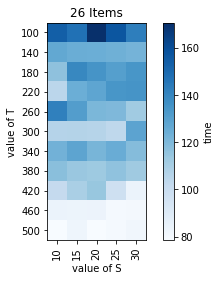

In [202]:
plt.xticks(ticks=np.arange(len(ss)),labels=ss,rotation=90)
plt.yticks(ticks=np.arange(len(ts)),labels=ts)
plt.xlabel('value of S')
plt.ylabel('value of T')

# save this plot inside a variable called hm
hm=plt.imshow(times[26], cmap='Blues',interpolation="nearest")
# pass this heatmap object into plt.colorbar method.
plt.colorbar(hm, label='time')
plt.title("26 Items")

plt.show()